# Data Dictionary

## [Link to dataset](https://www.kaggle.com/datasets/uciml/biomechanical-features-of-orthopedic-patients/data)

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-7zrl{text-align:left;vertical-align:bottom}
</style>
<table class="tg"><thead>
  <tr>
    <th class="tg-7zrl">Column Name</th>
    <th class="tg-7zrl">Description</th>
    <th class="tg-7zrl">Data Type</th>
  </tr></thead>
<tbody>
  <tr>
    <td class="tg-7zrl">pelvic_incidence</td>
    <td class="tg-7zrl">Angle of pelvic incidence</td>
    <td class="tg-7zrl">Numerical (Float)</td>
  </tr>
  <tr>
    <td class="tg-7zrl">pelvic_tilt</td>
    <td class="tg-7zrl">Angle of pelvic tilt</td>
    <td class="tg-7zrl">Numerical (Float)</td>
  </tr>
  <tr>
    <td class="tg-7zrl">lumbar_lordosis_angle</td>
    <td class="tg-7zrl">Angle of lumbar lordosis</td>
    <td class="tg-7zrl">Numerical (Float)</td>
  </tr>
  <tr>
    <td class="tg-7zrl">sacral_slope</td>
    <td class="tg-7zrl">Angle of sacral slope</td>
    <td class="tg-7zrl">Numerical (Float)</td>
  </tr>
  <tr>
    <td class="tg-7zrl">pelvic_radius</td>
    <td class="tg-7zrl">Pelvic radius</td>
    <td class="tg-7zrl">Numerical (Float)</td>
  </tr>
  <tr>
    <td class="tg-7zrl">degree_spondylolisthesis</td>
    <td class="tg-7zrl">Degree of spondylolisthesis</td>
    <td class="tg-7zrl">Numerical (Float)</td>
  </tr>
  <tr>
    <td class="tg-7zrl">class</td>
    <td class="tg-7zrl">Diagnosis Class</td>
    <td class="tg-7zrl">Categorical</td>
  </tr>
</tbody></table>

# Import libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/biomechanical-features-of-orthopedic-patients/column_3C_weka.csv
/kaggle/input/biomechanical-features-of-orthopedic-patients/column_2C_weka.csv


In [2]:
!pip install imblearn
!pip install imbalanced-learn==0.10.1
!pip install --upgrade imbalanced-learn

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tempfile import TemporaryDirectory
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsTransformer, RadiusNeighborsClassifier, kneighbors_graph
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, LabelBinarizer
from sklearn.decomposition import PCA
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, roc_curve, auc, precision_recall_curve, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, pairwise_distances
from sklearn.model_selection import cross_val_predict
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import label_binarize
import optuna
import warnings

# Filter warnings (as was in your original code)
warnings.filterwarnings('ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.12.4
    Uninstalling imbalanced-learn-0.12.4:
      Successfully uninstalled imbalanced-learn-0.12.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 72.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.

# Load dataset

In [3]:
df = pd.read_csv("/kaggle/input/biomechanical-features-of-orthopedic-patients/column_3C_weka.csv")

# Split dataset

Split dataset into train and test dataset to prevent data leakage problem

In [4]:
x = df.drop('class', axis=1) 
y = df['class'] 

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 

# Print the shapes of the resulting sets
print("X_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (248, 6)
y_train shape: (248,)
X_test shape: (62, 6)
y_test shape: (62,)


# EDA

In [5]:
x_train.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
126,70.676898,21.704402,59.181161,48.972496,103.008354,27.810148
109,68.613001,15.082235,63.014696,53.530766,123.431174,39.497987
247,49.828135,16.736435,28.000000,33.091700,121.435558,1.913307
234,37.731992,9.386298,42.000000,28.345694,135.740926,13.683047
202,76.314028,41.933683,93.284863,34.380345,132.267286,101.218783


In [6]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 248 entries, 126 to 102
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          248 non-null    float64
 1   pelvic_tilt               248 non-null    float64
 2   lumbar_lordosis_angle     248 non-null    float64
 3   sacral_slope              248 non-null    float64
 4   pelvic_radius             248 non-null    float64
 5   degree_spondylolisthesis  248 non-null    float64
dtypes: float64(6)
memory usage: 13.6 KB


In [7]:
x_train.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,59.914854,16.881648,51.235758,43.033207,117.936050,25.361878
std,17.037413,9.518625,17.813783,13.258741,12.643236,38.261951
min,26.147921,-6.554948,14.000000,13.516568,70.082575,-11.058179
25%,46.339666,10.210614,36.919996,33.420565,110.826065,1.621685
50%,57.068628,15.563266,48.831327,42.182580,118.066181,11.166394
75%,72.581489,21.122489,61.731838,52.933180,125.247278,39.332866
max,129.834041,48.903653,100.744220,121.429566,163.071041,418.543082


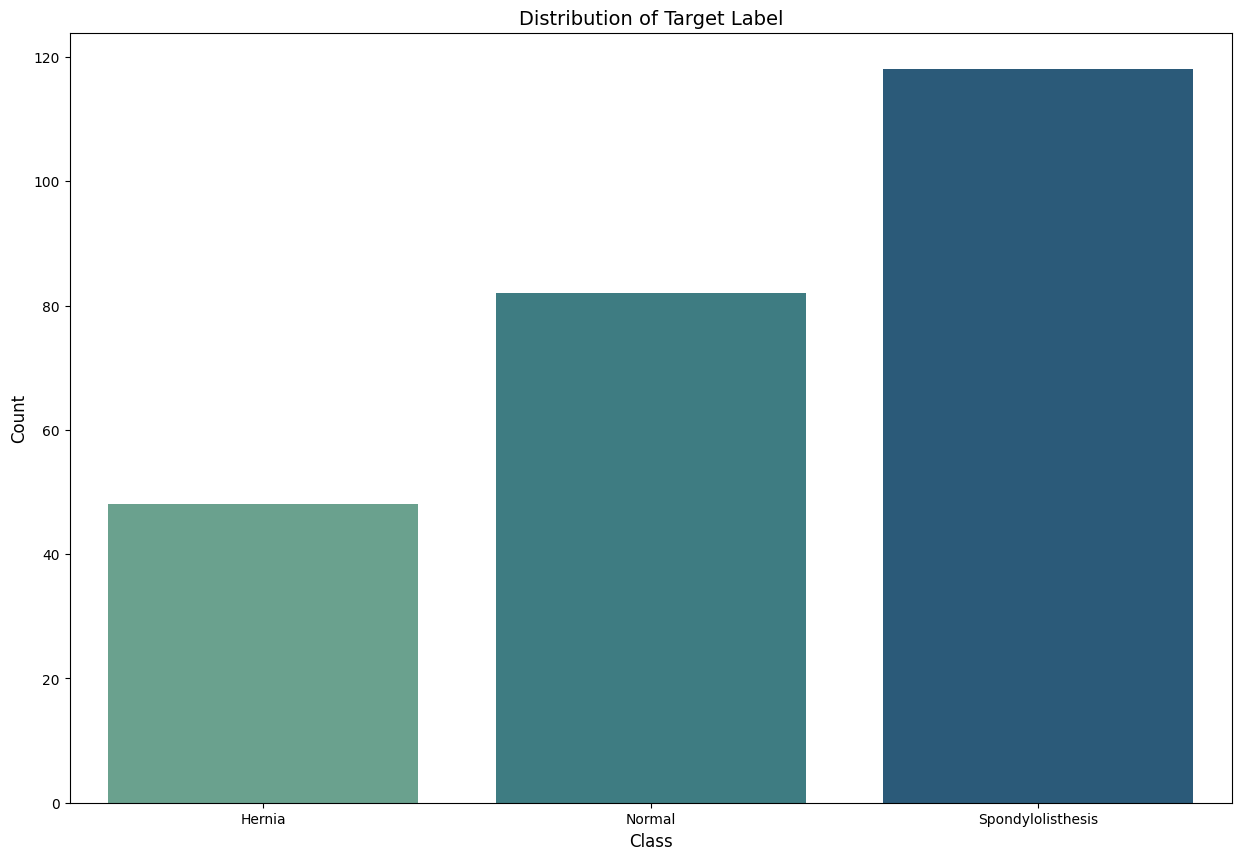

In [8]:
# Set the figure size
plt.figure(figsize=(15, 10)) 

# Create the count plot
sns.countplot(x=y_train.sort_values(), data=x_train, palette='crest') 

# Set the axis labels
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Set the title
plt.title('Distribution of Target Label', fontsize=14)

# Show the plot
plt.show()

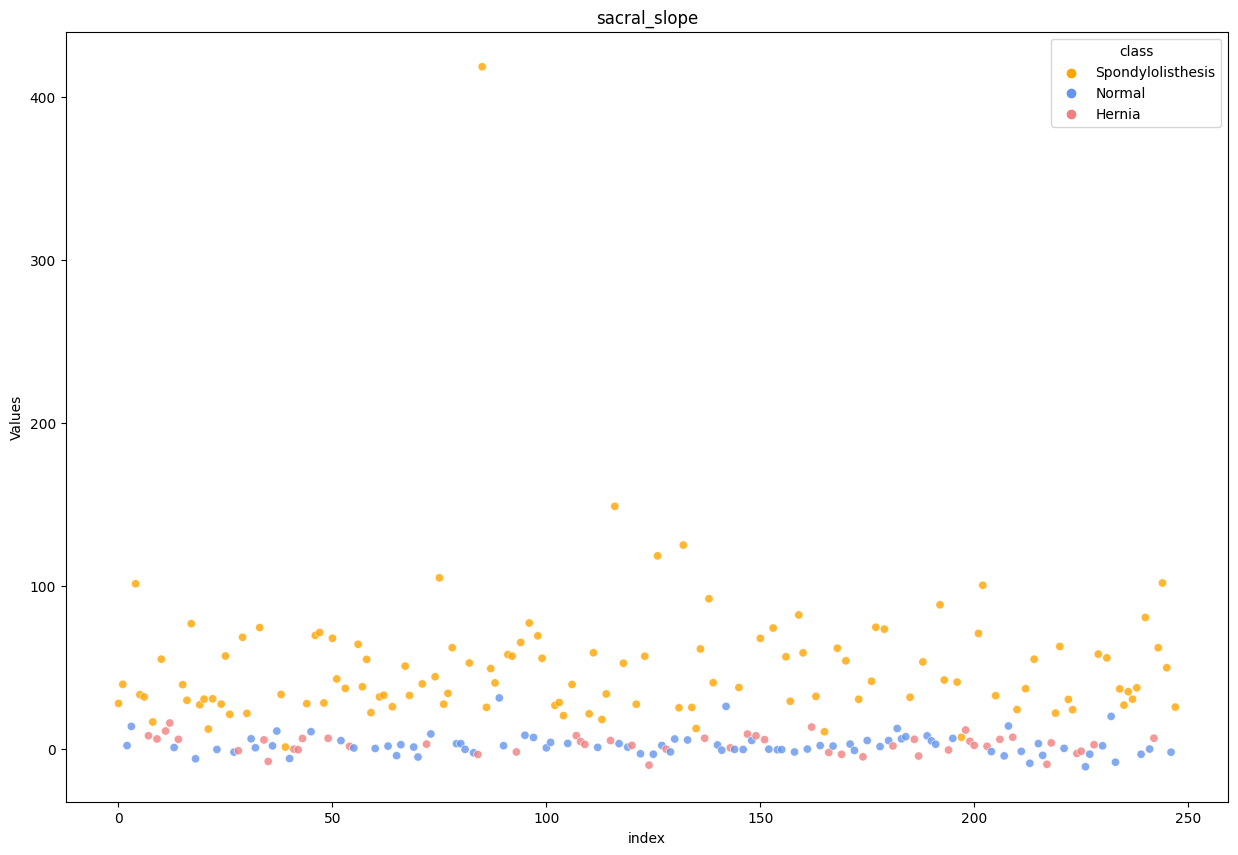

In [9]:
# Create the scatter plot using seaborn
plt.figure(figsize=(15, 10))  # Adjust figure size if needed
sns.scatterplot(x=np.arange(len(x_train)),  # Use index as x-axis
                y='degree_spondylolisthesis', 
                hue=y_train,  # Color points based on 'class'
                data=x_train,
                palette={'Normal': 'cornflowerblue', 'Hernia': 'lightcoral', 'Spondylolisthesis': 'orange'}, # Set custom colors
                alpha=0.8) # set opacity

plt.title('sacral_slope')
plt.xlabel('index')
plt.ylabel('Values')
plt.show()

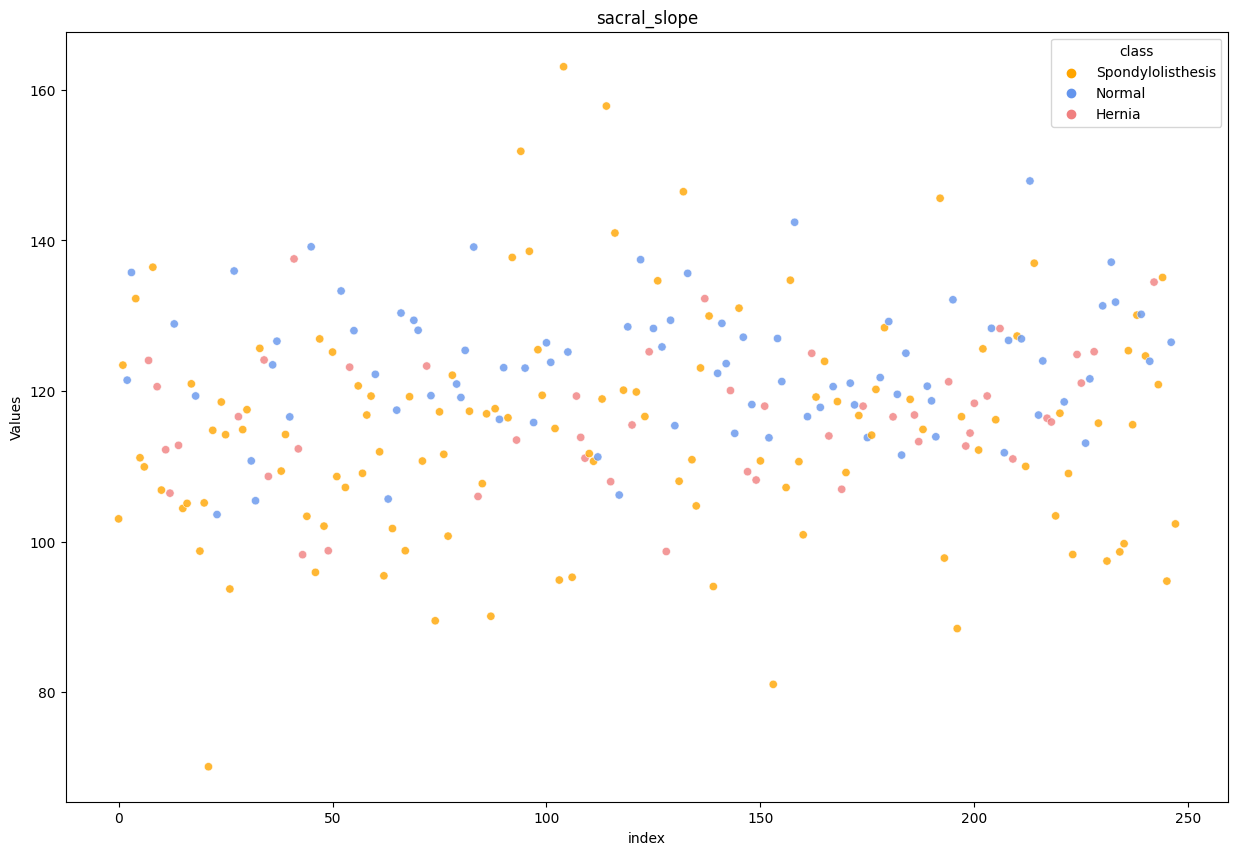

In [10]:
# Create the scatter plot using seaborn
plt.figure(figsize=(15, 10))  # Adjust figure size if needed
sns.scatterplot(x=np.arange(len(x_train)),  # Use index as x-axis
                y='pelvic_radius', 
                hue=y_train,  # Color points based on 'class'
                data=x_train,
                palette={'Normal': 'cornflowerblue', 'Hernia': 'lightcoral', 'Spondylolisthesis': 'orange'}, # Set custom colors
                alpha=0.8) # set opacity

plt.title('sacral_slope')
plt.xlabel('index')
plt.ylabel('Values')
plt.show()

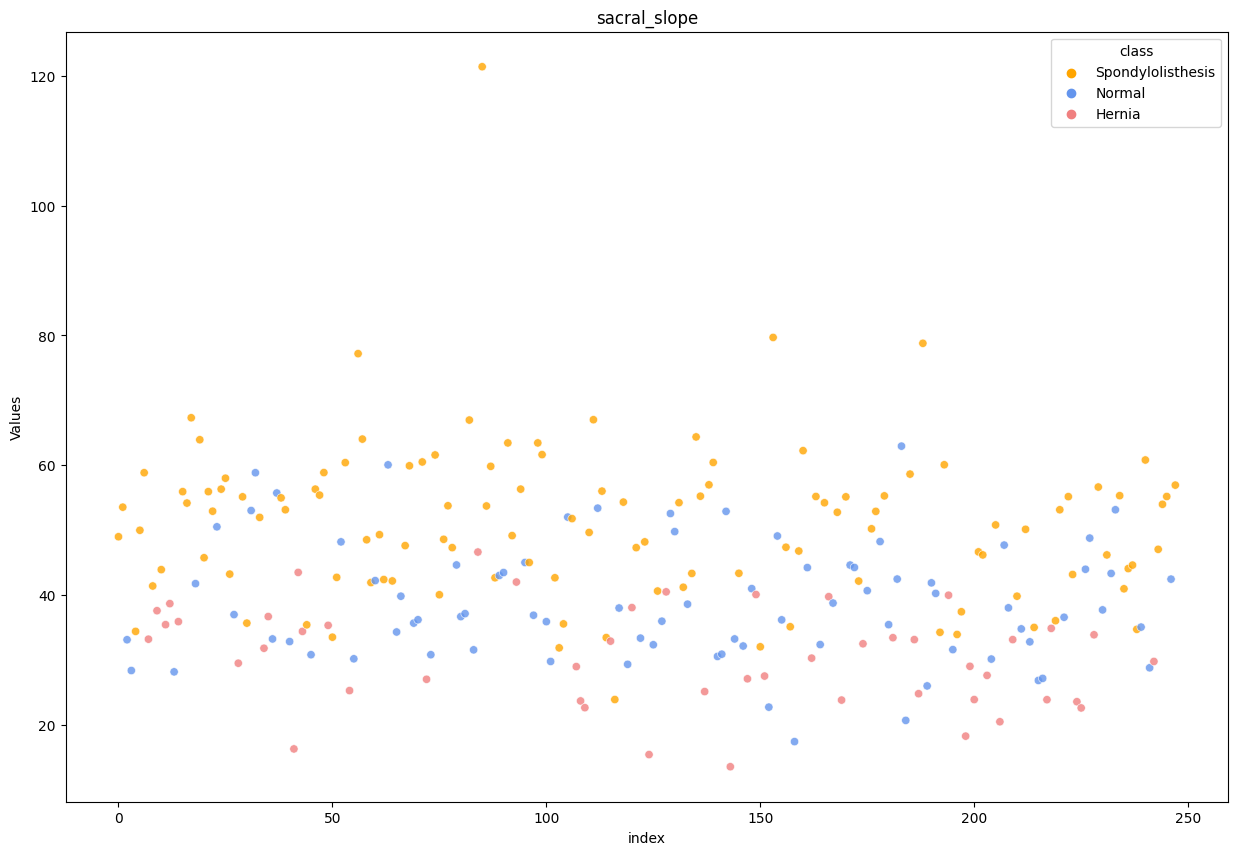

In [11]:
# Create the scatter plot using seaborn
plt.figure(figsize=(15, 10))  # Adjust figure size if needed
sns.scatterplot(x=np.arange(len(x_train)),  # Use index as x-axis
                y='sacral_slope', 
                hue=y_train,  # Color points based on 'class'
                data=x_train,
                palette={'Normal': 'cornflowerblue', 'Hernia': 'lightcoral', 'Spondylolisthesis': 'orange'}, # Set custom colors
                alpha=0.8) # set opacity

plt.title('sacral_slope')
plt.xlabel('index')
plt.ylabel('Values')
plt.show()

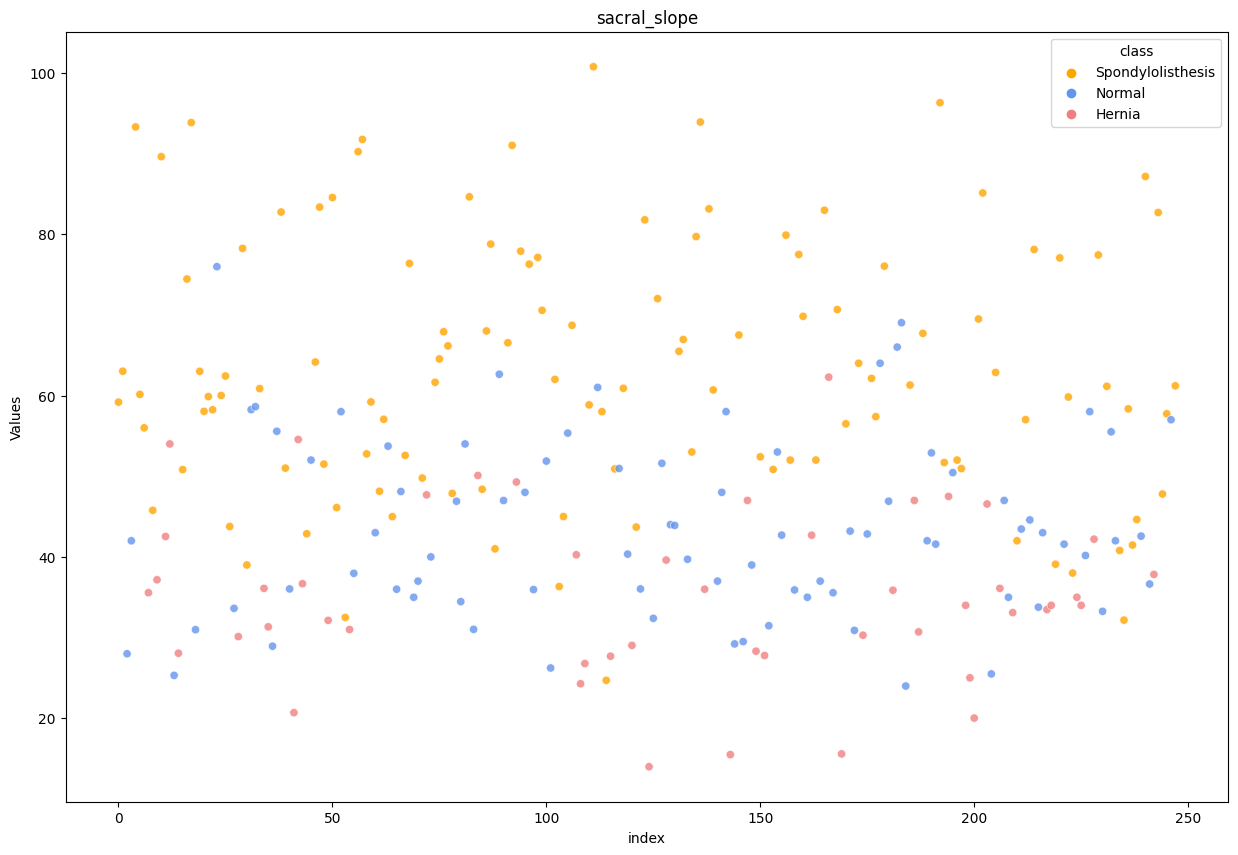

In [12]:
# Create the scatter plot using seaborn
plt.figure(figsize=(15, 10))  # Adjust figure size if needed
sns.scatterplot(x=np.arange(len(x_train)),  # Use index as x-axis
                y='lumbar_lordosis_angle', 
                hue=y_train,  # Color points based on 'class'
                data=x_train,
                palette={'Normal': 'cornflowerblue', 'Hernia': 'lightcoral', 'Spondylolisthesis': 'orange'}, # Set custom colors
                alpha=0.8) # set opacity

plt.title('sacral_slope')
plt.xlabel('index')
plt.ylabel('Values')
plt.show()

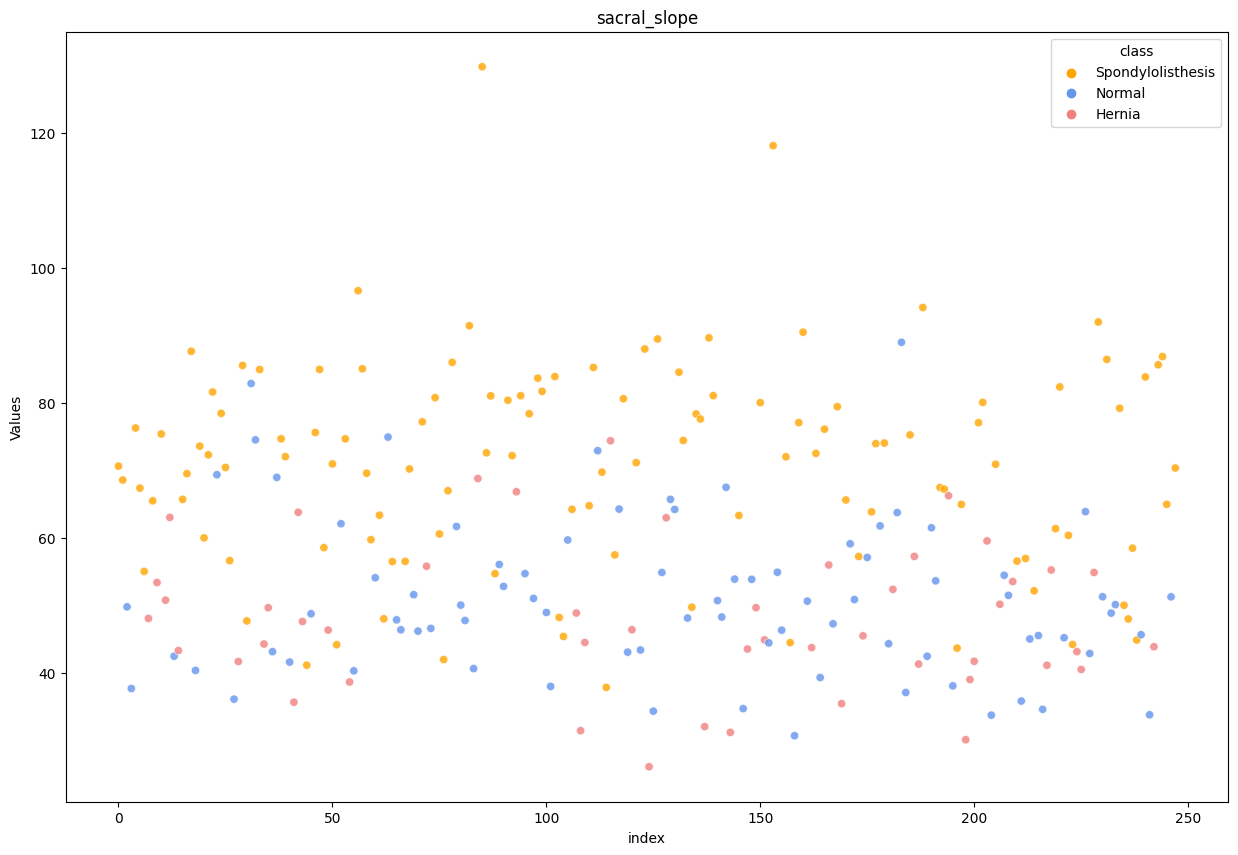

In [13]:
# Create the scatter plot using seaborn
plt.figure(figsize=(15, 10))  # Adjust figure size if needed
sns.scatterplot(x=np.arange(len(x_train)),  # Use index as x-axis
                y='pelvic_incidence', 
                hue=y_train,  # Color points based on 'class'
                data=x_train,
                palette={'Normal': 'cornflowerblue', 'Hernia': 'lightcoral', 'Spondylolisthesis': 'orange'}, # Set custom colors
                alpha=0.8) # set opacity

plt.title('sacral_slope')
plt.xlabel('index')
plt.ylabel('Values')
plt.show()

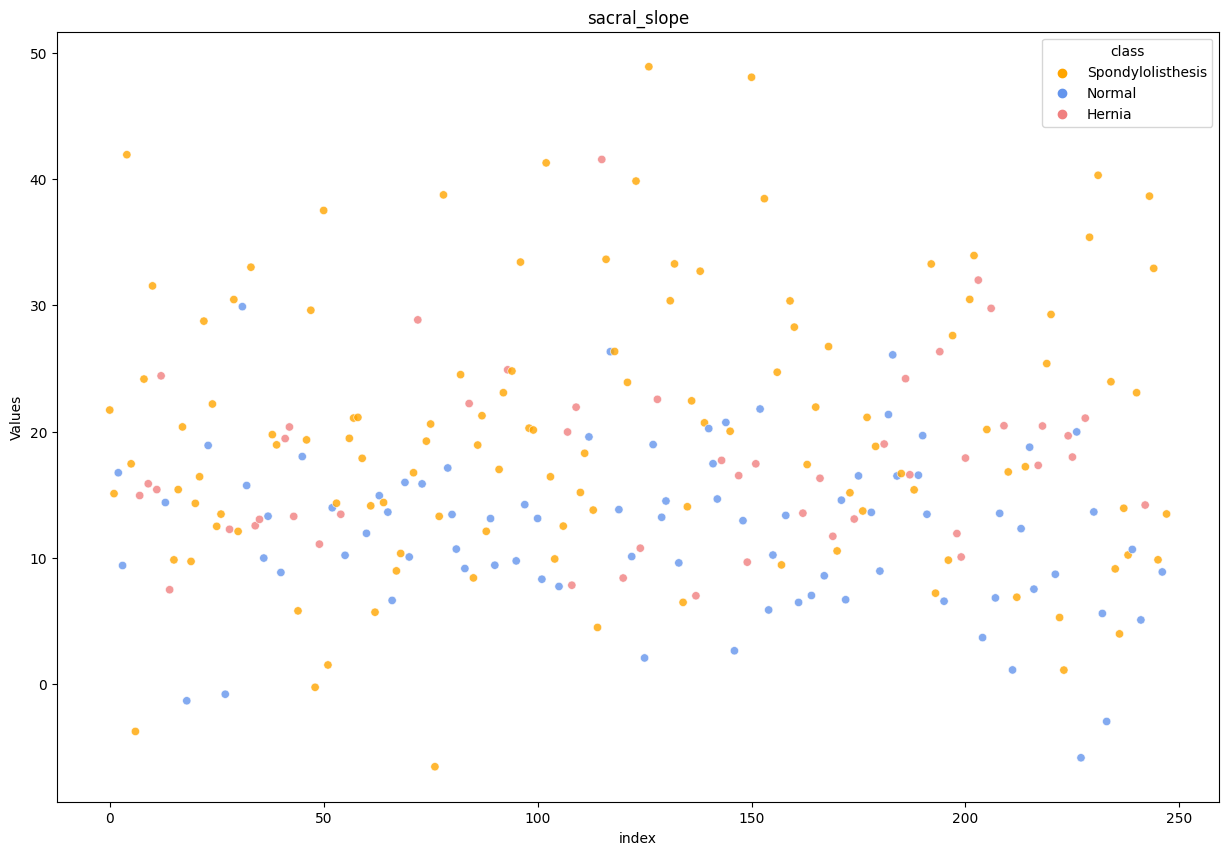

In [14]:
# Create the scatter plot using seaborn
plt.figure(figsize=(15, 10))  # Adjust figure size if needed
sns.scatterplot(x=np.arange(len(x_train)),  # Use index as x-axis
                y='pelvic_tilt', 
                hue=y_train,  # Color points based on 'class'
                data=x_train,
                palette={'Normal': 'cornflowerblue', 'Hernia': 'lightcoral', 'Spondylolisthesis': 'orange'}, # Set custom colors
                alpha=0.8) # set opacity

plt.title('sacral_slope')
plt.xlabel('index')
plt.ylabel('Values')
plt.show()

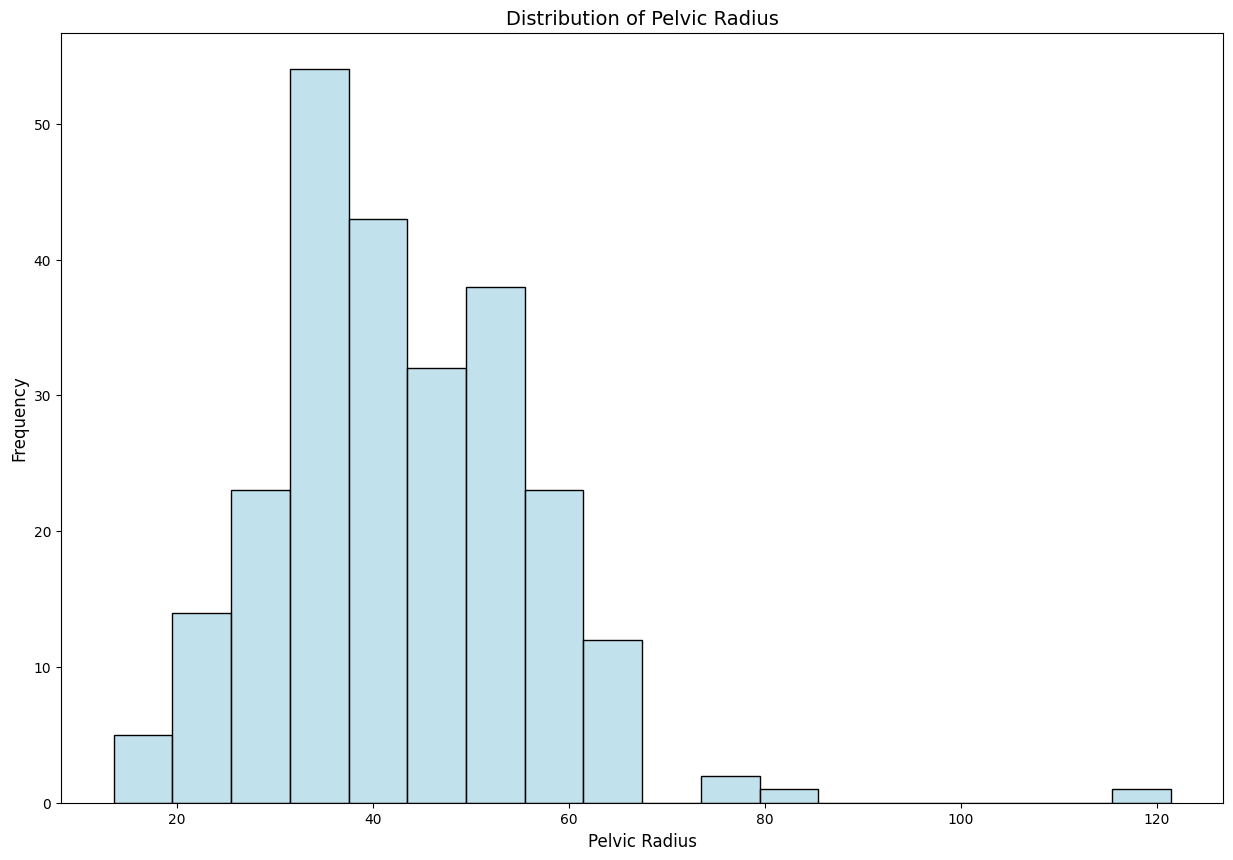

In [15]:
plt.figure(figsize=(15, 10))

sns.histplot(x=x_train['sacral_slope'], data=x_train, color='lightblue', kde=False)  # Use 'color'

plt.xlabel('Pelvic Radius', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.title('Distribution of Pelvic Radius', fontsize=14)
plt.show()

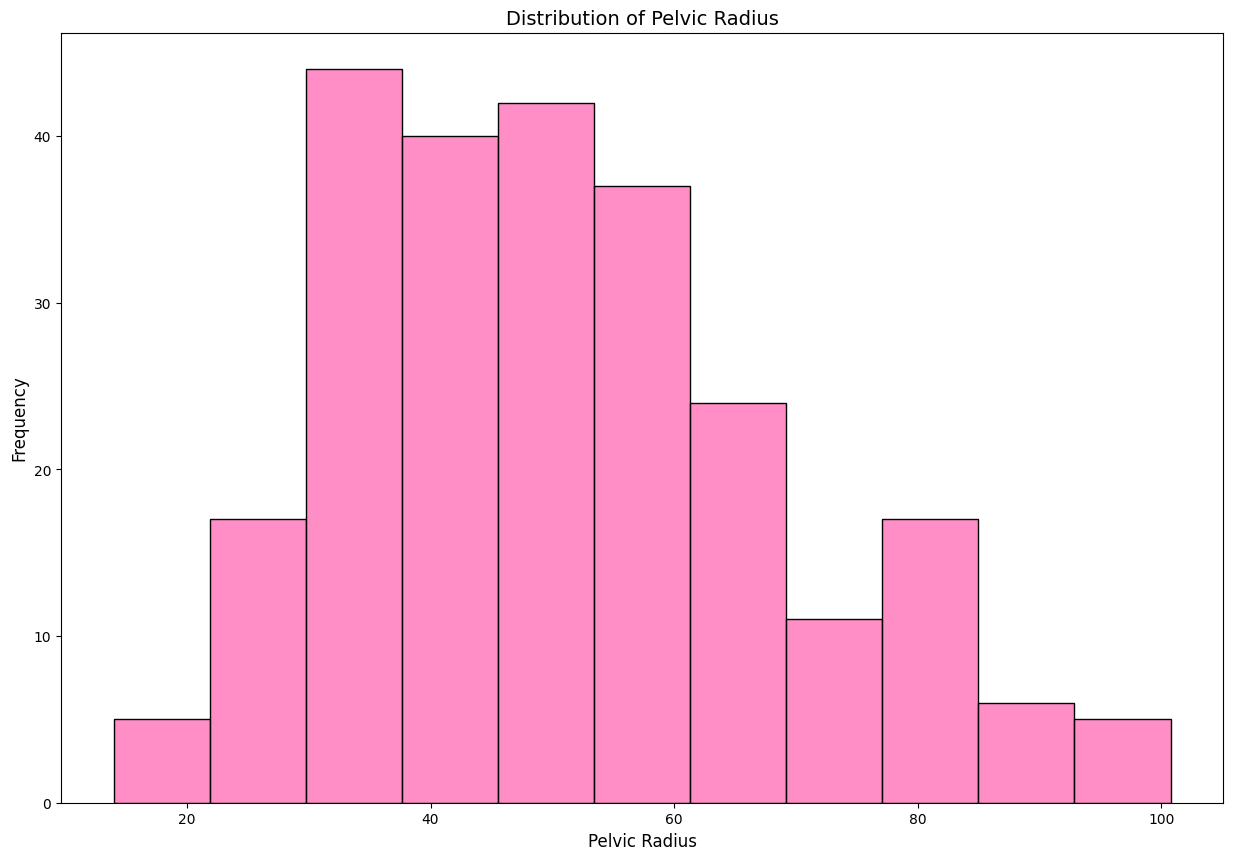

In [16]:
plt.figure(figsize=(15, 10))

sns.histplot(x=x_train['lumbar_lordosis_angle'], data=x_train, color='hotpink', kde=False)  # Use 'color'

plt.xlabel('Pelvic Radius', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.title('Distribution of Pelvic Radius', fontsize=14)

plt.show()

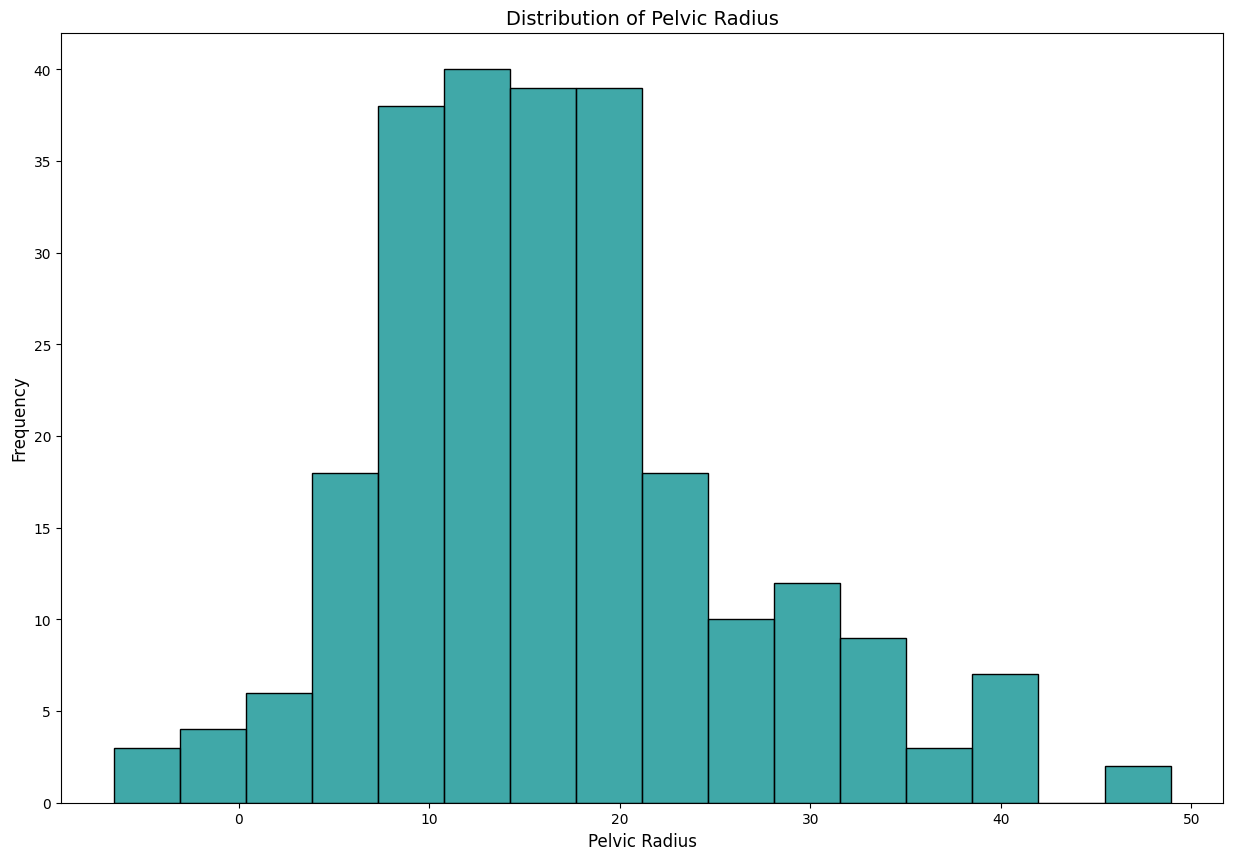

In [17]:
plt.figure(figsize=(15, 10))

sns.histplot(x=x_train['pelvic_tilt'], data=x_train, color='darkcyan', kde=False)  # Use 'color'

plt.xlabel('Pelvic Radius', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.title('Distribution of Pelvic Radius', fontsize=14)

plt.show()

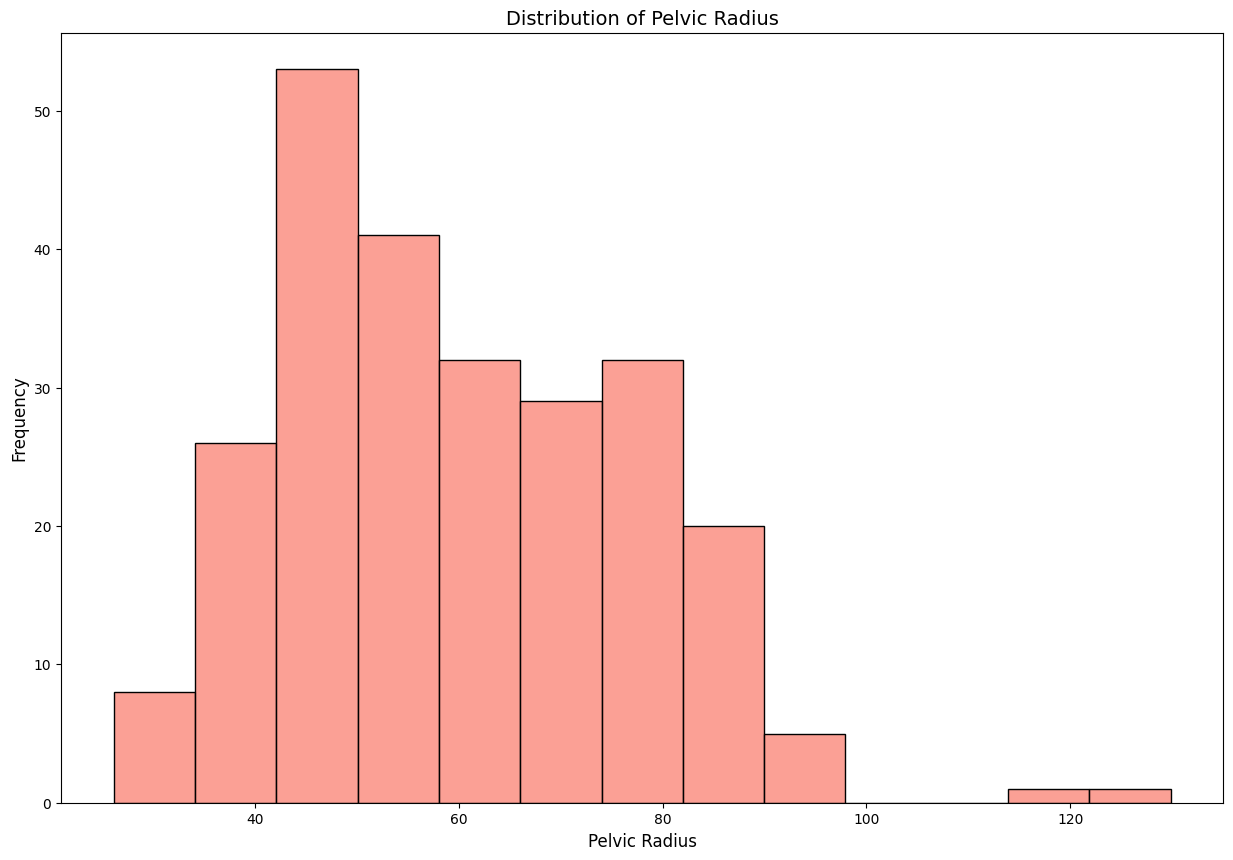

In [18]:
plt.figure(figsize=(15, 10))

sns.histplot(x=x_train['pelvic_incidence'], data=x_train, color='salmon', kde=False)  # Use 'color'

plt.xlabel('Pelvic Radius', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.title('Distribution of Pelvic Radius', fontsize=14)

plt.show()

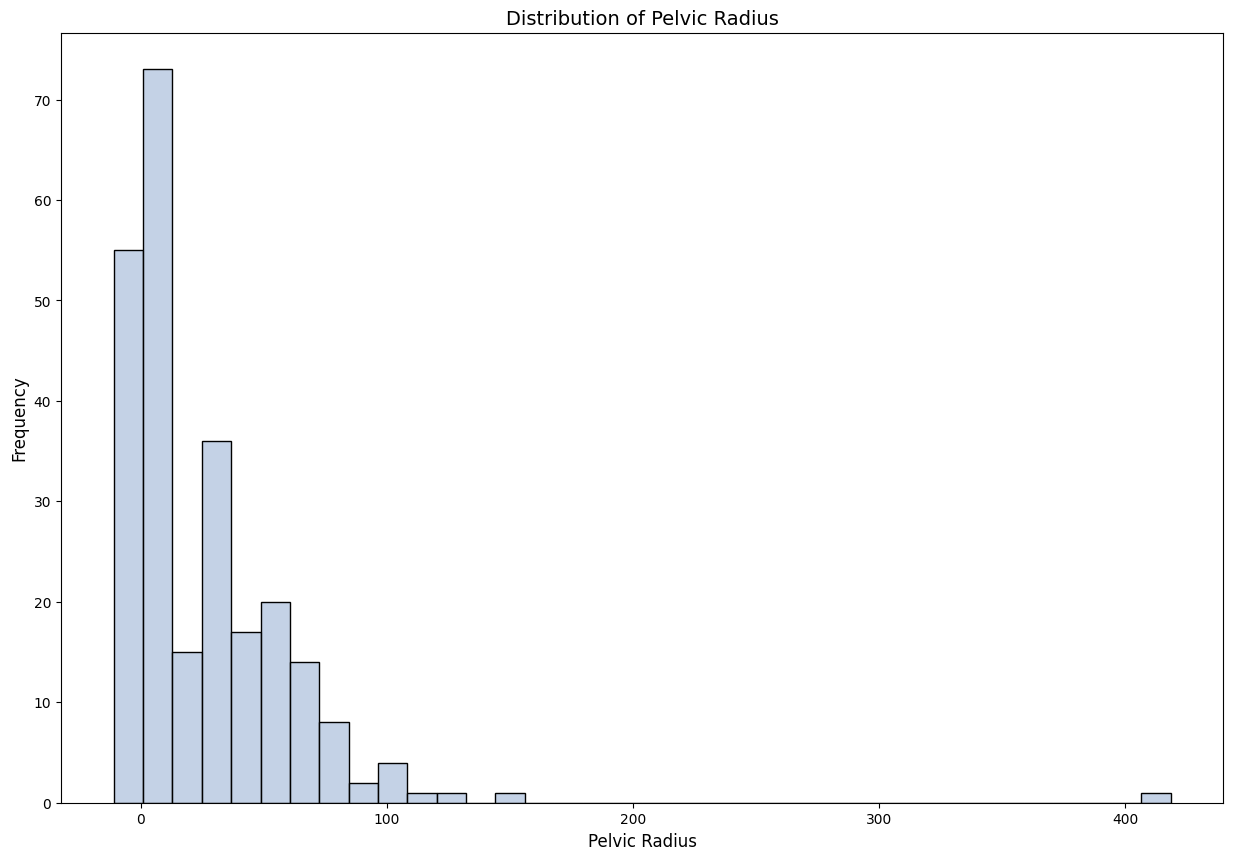

In [19]:
plt.figure(figsize=(15, 10))

sns.histplot(x=x_train['degree_spondylolisthesis'], data=x_train, color='lightsteelblue', kde=False)  # Use 'color'

plt.xlabel('Pelvic Radius', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.title('Distribution of Pelvic Radius', fontsize=14)

plt.show()

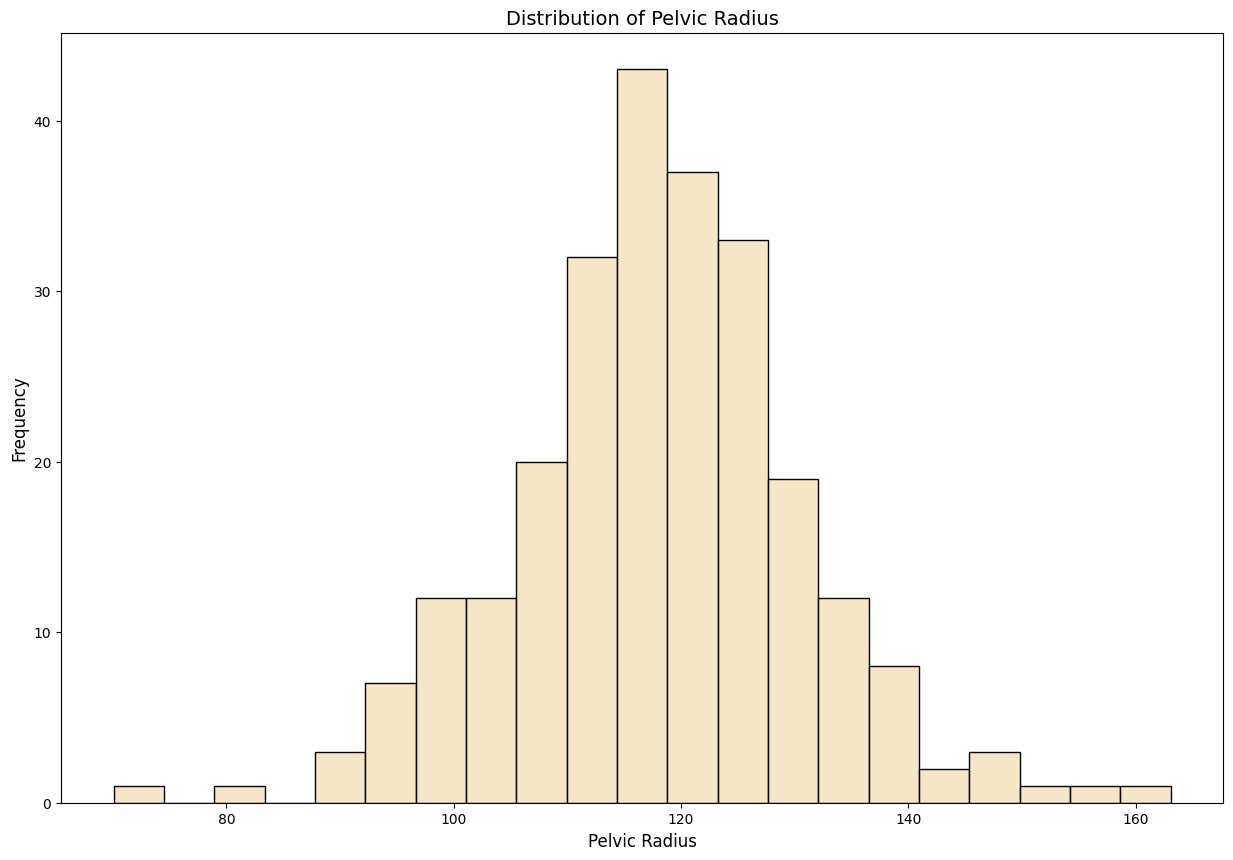

In [20]:
plt.figure(figsize=(15, 10))

sns.histplot(x=x_train['pelvic_radius'], data=x_train, color='wheat', kde=False)  # Use 'color'

plt.xlabel('Pelvic Radius', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.title('Distribution of Pelvic Radius', fontsize=14)

plt.show()

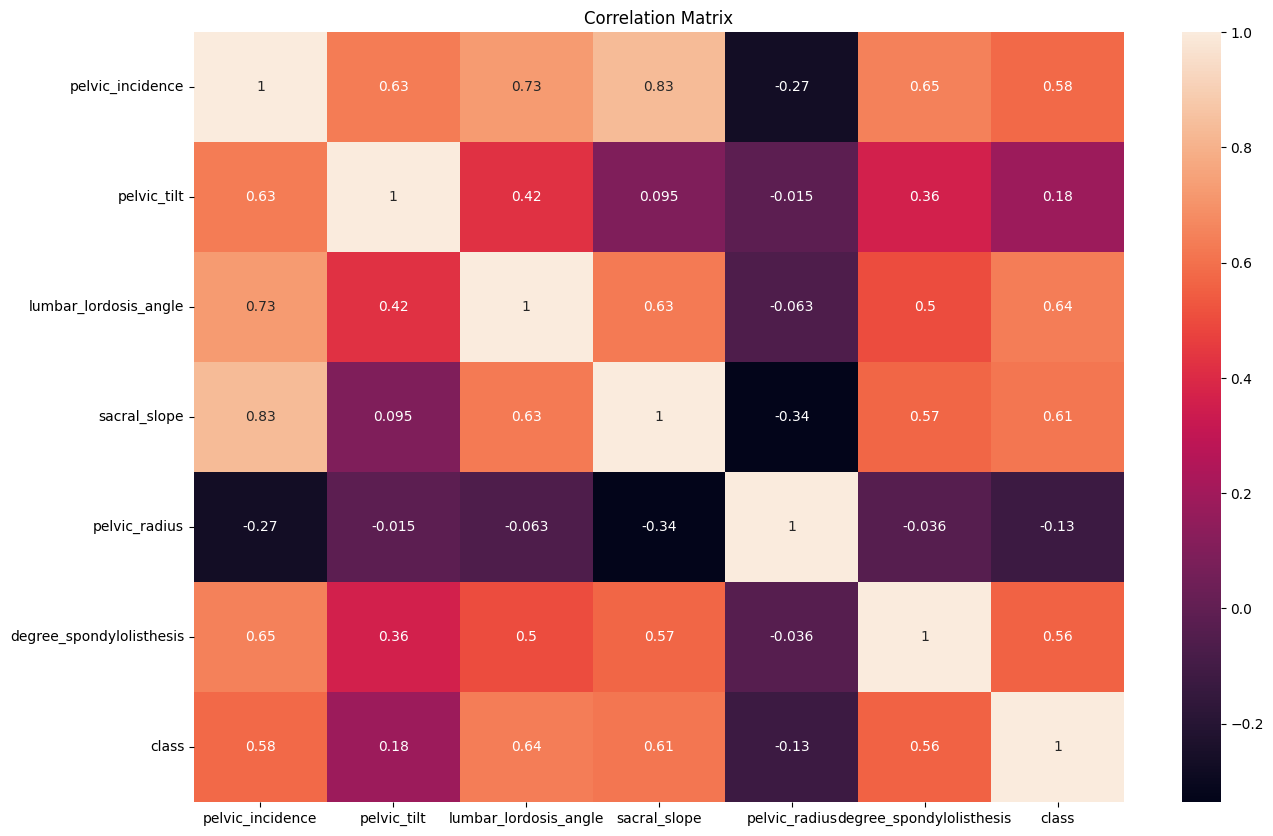

In [21]:
df_corr = pd.concat([x_train, y_train], axis=1) 

label = LabelEncoder()
df_corr['class'] = label.fit_transform(df_corr['class'])

correlation_matrix = df_corr.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True,cmap='rocket') 
plt.title('Correlation Matrix')
plt.show()

# Data Preprocessing

In [22]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 248 entries, 126 to 102
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          248 non-null    float64
 1   pelvic_tilt               248 non-null    float64
 2   lumbar_lordosis_angle     248 non-null    float64
 3   sacral_slope              248 non-null    float64
 4   pelvic_radius             248 non-null    float64
 5   degree_spondylolisthesis  248 non-null    float64
dtypes: float64(6)
memory usage: 13.6 KB


In [23]:
x_train.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,59.914854,16.881648,51.235758,43.033207,117.936050,25.361878
std,17.037413,9.518625,17.813783,13.258741,12.643236,38.261951
min,26.147921,-6.554948,14.000000,13.516568,70.082575,-11.058179
25%,46.339666,10.210614,36.919996,33.420565,110.826065,1.621685
50%,57.068628,15.563266,48.831327,42.182580,118.066181,11.166394
75%,72.581489,21.122489,61.731838,52.933180,125.247278,39.332866
max,129.834041,48.903653,100.744220,121.429566,163.071041,418.543082


In [24]:
x_train = x_train.drop(['pelvic_tilt','pelvic_radius'], axis = 1)
x_test = x_test.drop(['pelvic_tilt','pelvic_radius'], axis = 1)

## Encode Target Column

In [25]:
# Encode the target variable
label_encoder = LabelEncoder()
# Fit and transform on y_train
y_train = label_encoder.fit_transform(y_train)
# Transform y_test
y_test = label_encoder.transform(y_test)

In [26]:
# Print mapping after encoding
print("\nLabel mapping after encoding:")
for i, class_name in enumerate(label_encoder.classes_):
    print(f"{class_name} : {i}")


Label mapping after encoding:
Hernia : 0
Normal : 1
Spondylolisthesis : 2


In [27]:
x_train_withoutscale = x_train.copy()
y_train_withoutscale = y_train.copy()

## Scaling data

In [28]:
# Normalisation to data
scaler = StandardScaler()
scaler = scaler.fit(x_train)
x_train = scaler.transform(x_train)

In [29]:
x_train_withoutpca = x_train.copy()
y_train_withoutpca = y_train.copy()

## Dimensionality Reduction

In [30]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions.  You can change this as needed.
# Fit PCA on the training data (X)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

## Over-sampling


Class Distribution Before Over-Sampling:
Class
2    47.580645
1    33.064516
0    19.354839
Name: proportion, dtype: float64

Class Distribution After Over-Sampling:
Class
2    33.333333
1    33.333333
0    33.333333
Name: proportion, dtype: float64


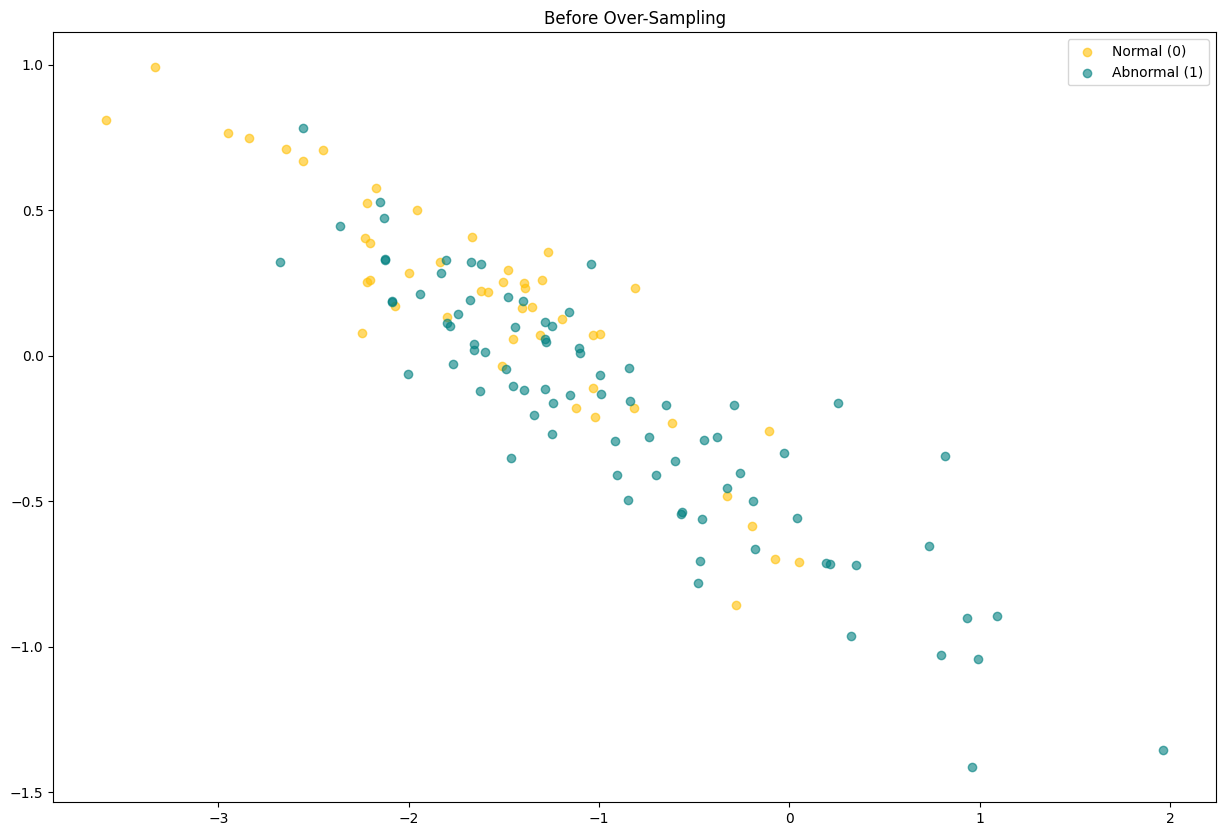

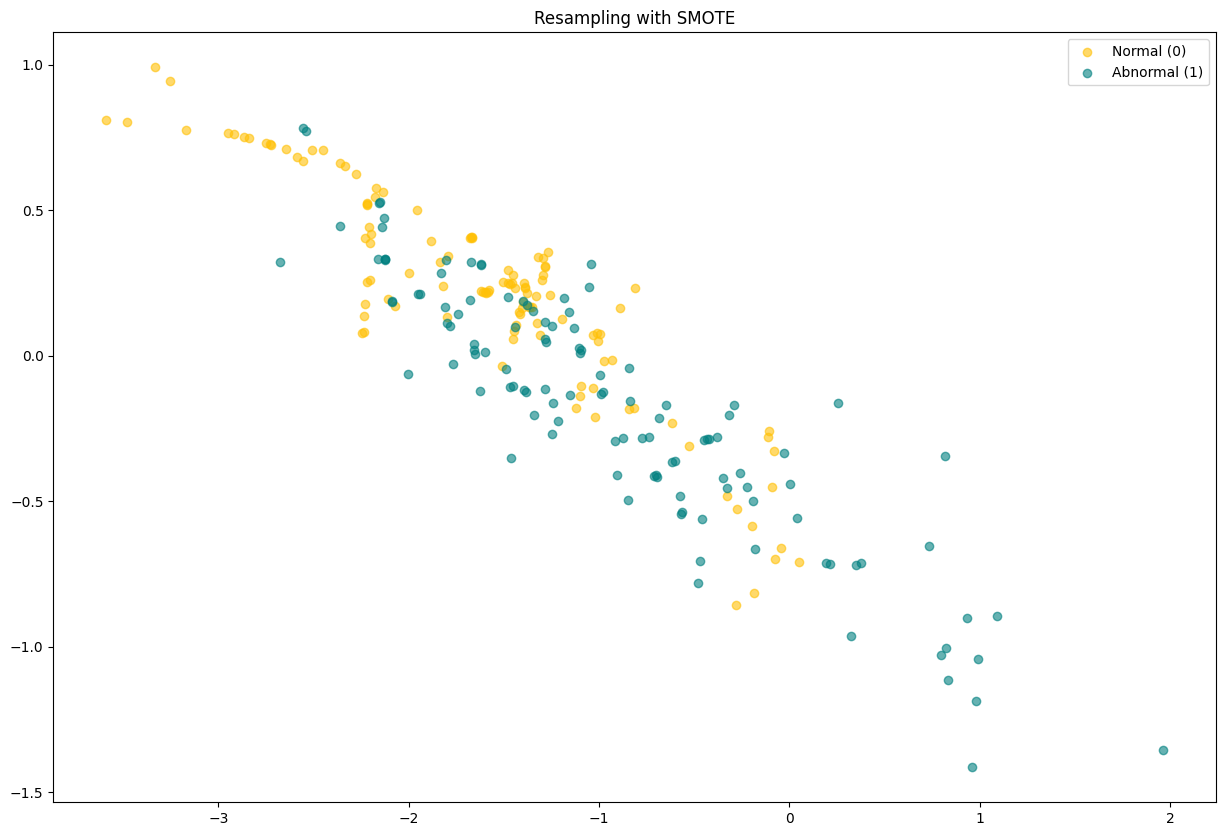

In [31]:
# Initialize SMOTE
sm = SMOTE(random_state=42)

# Apply SMOTE to oversample the minority class
x_resampled, y_resampled = sm.fit_resample(x_train, y_train)

# Convert y_train and y_resampled to pandas Series for value_counts
y_train_series = pd.Series(y_train, name='Class')
y_resampled_series = pd.Series(y_resampled, name='Class')

# Print class distribution before and after over-sampling
print("\nClass Distribution Before Over-Sampling:")
print(y_train_series.value_counts(normalize=True) * 100)

print("\nClass Distribution After Over-Sampling:")
print(y_resampled_series.value_counts(normalize=True) * 100)

# Apply PCA to reduce dimensionality to 2D for visualization
pca = PCA(n_components=2, random_state=42)

# Transform both the original and resampled datasets
x_train_pca = pca.fit_transform(x_train)  # Fit PCA on the original training data
x_resampled_pca = pca.transform(x_resampled)  # Transform resampled data using the same PCA

# Create DataFrames for plotting
df_before = pd.DataFrame(x_train_pca, columns=['PC1', 'PC2'])
df_before['Class'] = y_train

df_after = pd.DataFrame(x_resampled_pca, columns=['PC1', 'PC2'])
df_after['Class'] = y_resampled

# Define a color palette and label mapping for the two classes
color_map = {0: '#FFC107', 1: 'teal'}  # Yellow for Class 0 (Normal), Teal for Class 1 (Abnormal)
label_map = {0: 'Normal', 1: 'Abnormal'}

# Plot 1: Before Over-Sampling
plt.figure(figsize=(15, 10))
for label in np.unique(y_train):
    if label in color_map:
        plt.scatter(
            df_before[df_before['Class'] == label]['PC1'],
            df_before[df_before['Class'] == label]['PC2'],
            color=color_map[label],
            label=f'{label_map.get(label, str(label))} ({label})',
            alpha=0.6
        )
plt.xlabel('')
plt.ylabel('')
plt.title('Before Over-Sampling')
plt.legend(loc='best')
plt.show()

print()
# Plot 2: After Over-Sampling (Resampling with SMOTE)
plt.figure(figsize=(15, 10))
for label in np.unique(y_resampled):
    if label in color_map:
        plt.scatter(
            df_after[df_after['Class'] == label]['PC1'],
            df_after[df_after['Class'] == label]['PC2'],
            color=color_map[label],
            label=f'{label_map.get(label, str(label))} ({label})',
            alpha=0.6
        )
plt.xlabel('')
plt.ylabel('')
plt.title('Resampling with SMOTE')
plt.legend(loc='best')
plt.show()

# Modeling, Experiments, and Visaulization

## Cross-validation of K-Neighbors Classifier and Radius Neighbors Classifier

In [32]:
# Define the list of models
ml_models = [
    ("KNeighborsClassifier", KNeighborsClassifier()),
    ("RadiusNeighborsClassifier", RadiusNeighborsClassifier(outlier_label='most_frequent')),  # Handle outliers
]

for model in ml_models:
    print(model[0]+": ")
    model[1].fit(x_train, y_train)
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    cv = cross_val_score(model[1], x_train, y_train, cv=10, scoring='accuracy')
    print("\tK-Fold Cross-Validation:", cv)
    print('-'*100)
    print(f'\tAverage K-Fold Cross-Validation: {cv.mean()}')
    print('-'*100)

KNeighborsClassifier: 
	K-Fold Cross-Validation: [0.76       0.68       0.8        0.76       0.8        0.68
 0.68       0.76       0.83333333 0.75      ]
----------------------------------------------------------------------------------------------------
	Average K-Fold Cross-Validation: 0.7503333333333333
----------------------------------------------------------------------------------------------------
RadiusNeighborsClassifier: 
	K-Fold Cross-Validation: [0.6        0.6        0.72       0.8        0.76       0.68
 0.76       0.68       0.66666667 0.75      ]
----------------------------------------------------------------------------------------------------
	Average K-Fold Cross-Validation: 0.7016666666666667
----------------------------------------------------------------------------------------------------


## Decision Boundary of K-Neighbors Classifier and Radius Neighbors Classifier

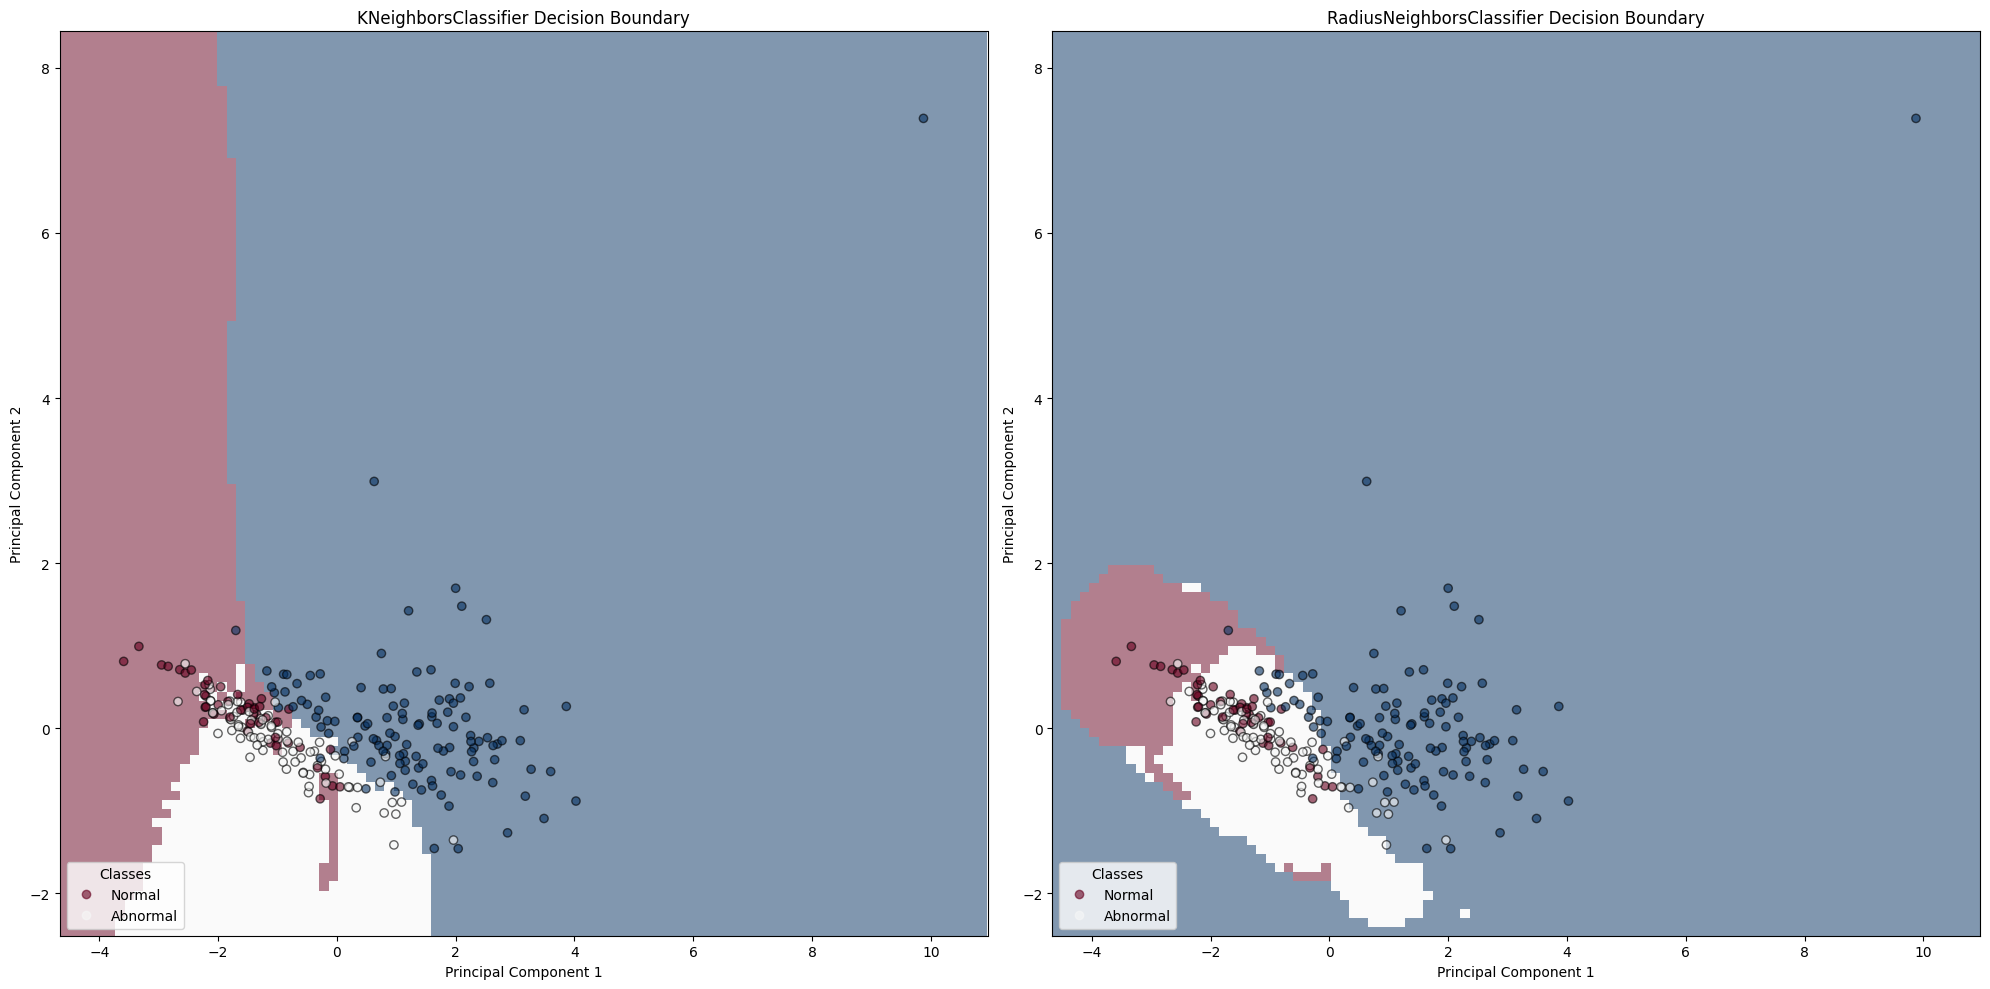

In [33]:
# Create a mesh grid for plotting the decision boundary
h = 0.02  # Step size in the mesh
# Use tighter ranges with 5% padding to avoid empty space
x_range = x_train_pca[:, 0].max() - x_train_pca[:, 0].min()
y_range = x_train_pca[:, 1].max() - x_train_pca[:, 1].min()
padding_x = 0.05 * x_range
padding_y = 0.05 * y_range
x_min, x_max = x_train_pca[:, 0].min() - padding_x, x_train_pca[:, 0].max() + padding_x
y_min, y_max = x_train_pca[:, 1].min() - padding_y, x_train_pca[:, 1].max() + padding_y
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Create subplots for the two models
fig, axs = plt.subplots(ncols=2, figsize=(20, 10))

# Class names for the binary classification problem
class_names = ['Normal', 'Abnormal']  # Assuming 0 = Normal, 1 = Abnormal

for (model_name, model), ax in zip(ml_models, axs):
    # Fit the model on the PCA-transformed data
    model.fit(x_train_pca, y_train)

    # Plot the decision boundary using DecisionBoundaryDisplay
    disp = DecisionBoundaryDisplay.from_estimator(
        model,
        x_train_pca,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel="Principal Component 1",
        ylabel="Principal Component 2",
        shading="auto",
        alpha=0.5,
        ax=ax,
        cmap=plt.cm.RdBu  # Red-blue colormap for binary classification
    )

    # Scatter the training points
    scatter = ax.scatter(
        x_train_pca[:, 0],
        x_train_pca[:, 1],
        c=y_train,
        cmap=plt.cm.RdBu,
        edgecolors="k",
        alpha=0.6
    )

    # Add a legend
    ax.legend(
        scatter.legend_elements()[0],
        class_names,
        loc="lower left",
        title="Classes",
    )

    # Set the title
    ax.set_title(f"{model_name} Decision Boundary")

plt.tight_layout()
plt.show()

## Caching nearest neighbors of the algorithm

### K-Neighbors Classifier

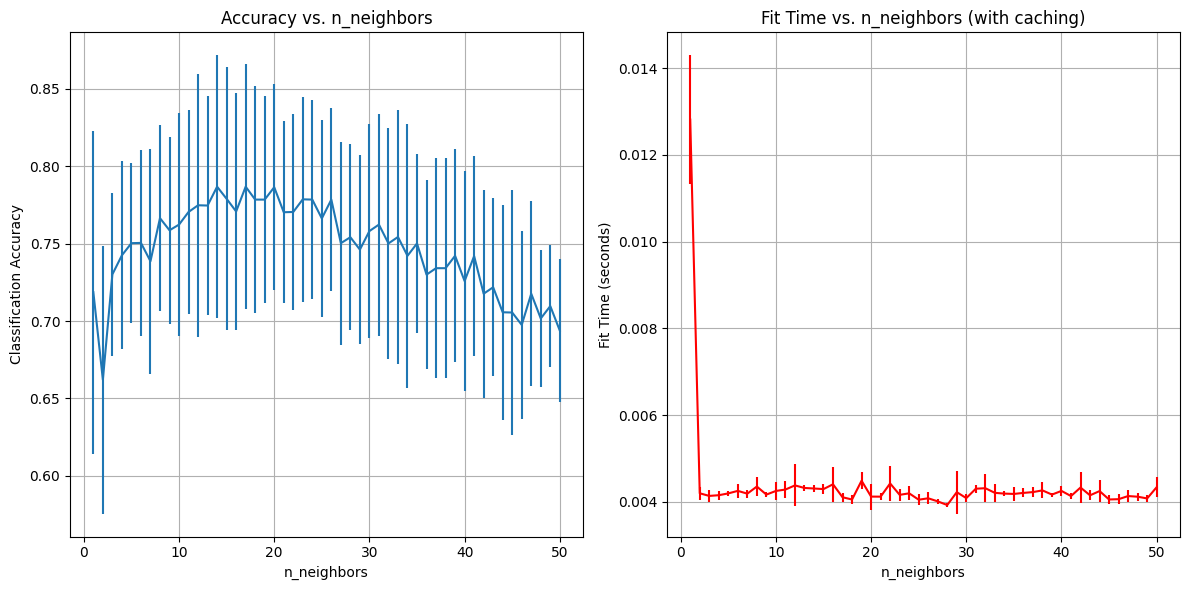


Best Parameters: {'classifier__n_neighbors': 14}
Best Cross-Validation Accuracy: 0.7868333333333333


In [34]:
# Define the range of n_neighbors to search
n_neighbors_list = list(range(1, 51))

# The transformer computes the nearest neighbors graph using the maximum number of neighbors
graph_model = KNeighborsTransformer(n_neighbors=max(n_neighbors_list), mode="distance")
classifier_model = KNeighborsClassifier(metric="precomputed")

# Use TemporaryDirectory to cache the graph computation
with TemporaryDirectory(prefix="sklearn_graph_cache_") as tmpdir:
    full_model = Pipeline(
        steps=[("graph", graph_model), ("classifier", classifier_model)],
        memory=tmpdir
    )

    # Define the parameter grid for grid search
    param_grid = {"classifier__n_neighbors": n_neighbors_list}

    # Perform grid search with caching
    grid_model = GridSearchCV(full_model, param_grid, cv=10, scoring='accuracy')
    grid_model.fit(x_train, y_train)

# Plot the results of the grid search
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Increased figure size for readability

# Plot accuracy vs. n_neighbors
axes[0].errorbar(
    x=n_neighbors_list,
    y=grid_model.cv_results_["mean_test_score"],
    yerr=grid_model.cv_results_["std_test_score"],
)
axes[0].set_xlabel("n_neighbors")
axes[0].set_ylabel("Classification Accuracy")
axes[0].set_title("Accuracy vs. n_neighbors")
axes[0].grid(True)

# Plot fit time vs. n_neighbors
axes[1].errorbar(
    x=n_neighbors_list,
    y=grid_model.cv_results_["mean_fit_time"],
    yerr=grid_model.cv_results_["std_fit_time"],
    color="r",
)
axes[1].set_xlabel("n_neighbors")
axes[1].set_ylabel("Fit Time (seconds)")
axes[1].set_title("Fit Time vs. n_neighbors (with caching)")
axes[1].grid(True)

fig.tight_layout()
plt.show()

# Print the best parameters and score
print("\nBest Parameters:", grid_model.best_params_)
print("Best Cross-Validation Accuracy:", grid_model.best_score_)

### Radius Neighbors Classifier

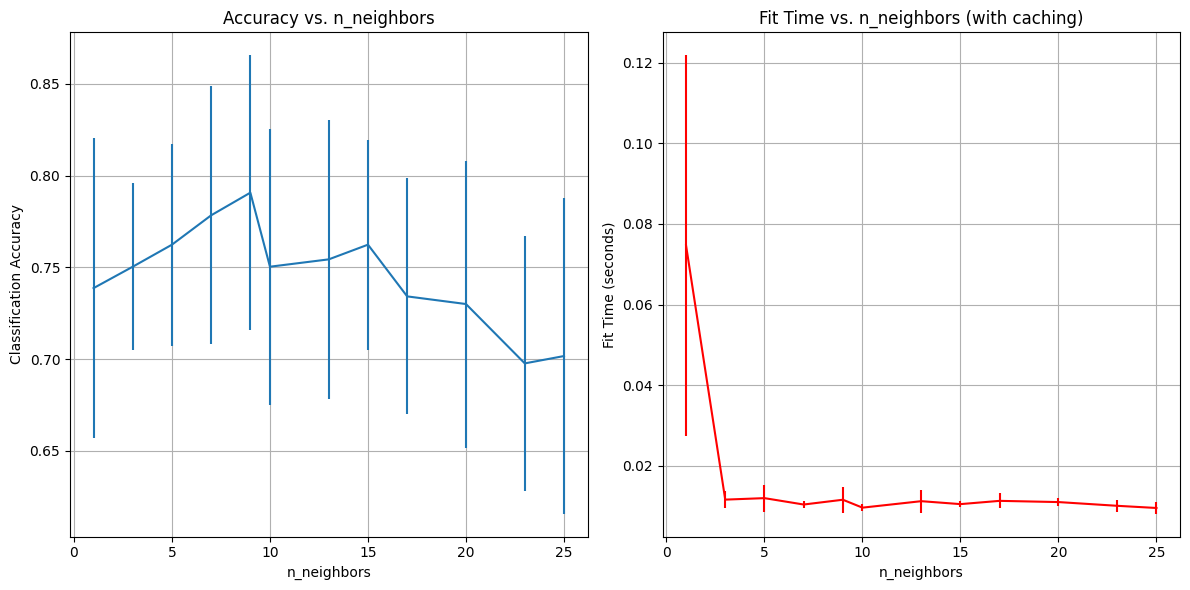


Best Parameters: {'classifier__n_neighbors': 9}
Best Cross-Validation Accuracy: 0.7906666666666667


In [35]:
# Define the range of n_neighbors to search
n_neighbors_list = [1, 3, 5, 7, 9, 10, 13, 15, 17, 20, 23, 25]  # Removed floats, using integers for n_neighbors

# The transformer computes the nearest neighbors graph using the maximum number of neighbors
graph_model = KNeighborsTransformer(n_neighbors=max(n_neighbors_list), mode="distance")
classifier_model = KNeighborsClassifier()

# Use TemporaryDirectory to cache the graph computation
with TemporaryDirectory(prefix="sklearn_graph_cache_") as tmpdir:
    full_model = Pipeline(
        steps=[("scaler", StandardScaler()), ("graph", graph_model), ("classifier", classifier_model)],
        memory=tmpdir
    )

    # Define the parameter grid for grid search
    param_grid = {"classifier__n_neighbors": n_neighbors_list}

    # Perform grid search with caching
    grid_model = GridSearchCV(full_model, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
    grid_model.fit(x_train, y_train)

# Plot the results of the grid search
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Increased figure size for readability

# Plot accuracy vs. n_neighbors
axes[0].errorbar(
    x=n_neighbors_list,
    y=grid_model.cv_results_["mean_test_score"],
    yerr=grid_model.cv_results_["std_test_score"],
)
axes[0].set_xlabel("n_neighbors")
axes[0].set_ylabel("Classification Accuracy")
axes[0].set_title("Accuracy vs. n_neighbors")
axes[0].grid(True)

# Plot fit time vs. n_neighbors
axes[1].errorbar(
    x=n_neighbors_list,
    y=grid_model.cv_results_["mean_fit_time"],
    yerr=grid_model.cv_results_["std_fit_time"],
    color="r",
)
axes[1].set_xlabel("n_neighbors")
axes[1].set_ylabel("Fit Time (seconds)")
axes[1].set_title("Fit Time vs. n_neighbors (with caching)")
axes[1].grid(True)

fig.tight_layout()
plt.show()

# Print the best parameters and score
print("\nBest Parameters:", grid_model.best_params_)
print("Best Cross-Validation Accuracy:", grid_model.best_score_)

## Hyperparameters Tuning

In [36]:
# Define objective functions for Optuna
def objective_knn(trial):
    # Suggest hyperparameters for KNeighborsClassifier
    params = {
        'n_neighbors': trial.suggest_int('n_neighbors', 1, 50),
        'weights': trial.suggest_categorical('weights', ['uniform', 'distance']),
        'p': trial.suggest_categorical('p', [1, 2]),  # 1 for Manhattan, 2 for Euclidean
    }
    
    # Initialize the model with suggested parameters
    model = KNeighborsClassifier(**params)
    
    # Perform cross-validation
    cv_scores = cross_val_score(model, x_train, y_train, cv=kf, scoring='accuracy')
    return cv_scores.mean()

def objective_radius(trial):
    # Suggest hyperparameters for RadiusNeighborsClassifier
    params = {
        'radius': trial.suggest_float('radius', 0.1, 10.0, log=True),
        'weights': trial.suggest_categorical('weights', ['uniform', 'distance']),
        'p': trial.suggest_categorical('p', [1, 2]),  # 1 for Manhattan, 2 for Euclidean
        'outlier_label': 'most_frequent'  # Fixed as in original code
    }
    
    # Initialize the model with suggested parameters
    model = RadiusNeighborsClassifier(**params)
    
    # Perform cross-validation
    cv_scores = cross_val_score(model, x_train, y_train, cv=10, scoring='accuracy')
    return cv_scores.mean()

# Perform hyperparameter tuning for each model using Optuna
models_to_tune = [
    ("KNeighborsClassifier", objective_knn),
    ("RadiusNeighborsClassifier", objective_radius)
]

best_params = {}
for model_name, objective_func in models_to_tune:
    #print(f"\nTuning {model_name}:")
    #print('-' * 100)
    
    # Create an Optuna study
    study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=42))
    study.optimize(objective_func, n_trials=50)  # Run 50 trials
    
    # Get the best trial
    best_trial = study.best_trial
    
    # Print the best hyperparameters and score
    print(f"\tBest Hyperparameters: {best_trial.params}")
    print('-' * 100)
    print(f"\tBest Cross-Validation Accuracy: {best_trial.value:.3f}")
    print('-' * 100)
    
    # Store the best parameters
    best_params[model_name] = best_trial.params

# Define the tuned models with the best hyperparameters
tuned_models = [
    ("KNeighborsClassifier", KNeighborsClassifier(
        n_neighbors=best_params["KNeighborsClassifier"]['n_neighbors'],
        weights=best_params["KNeighborsClassifier"]['weights'],
        p=best_params["KNeighborsClassifier"]['p']
    )),
    ("RadiusNeighborsClassifier", RadiusNeighborsClassifier(
        radius=best_params["RadiusNeighborsClassifier"]['radius'],
        weights=best_params["RadiusNeighborsClassifier"]['weights'],
        p=best_params["RadiusNeighborsClassifier"]['p'],
        outlier_label='most_frequent'
    ))
]

# Perform cross-validation with the tuned models
print("\nCross-Validation with Tuned Models:")
for model_name, model in tuned_models:
    print(f"\n{model_name}:")
    print('-' * 100)
    cv_scores = cross_val_score(model, x_train, y_train, cv=kf, scoring='accuracy')
    print(f"\tK-Fold Cross-Validation: {cv_scores}")
    print(f"\tAverage K-Fold Cross-Validation: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")
    print('-' * 100)

[I 2025-08-19 16:33:08,637] A new study created in memory with name: no-name-75a0194f-c030-497b-ada1-ab449e406d4d
[I 2025-08-19 16:33:08,692] Trial 0 finished with value: 0.7626666666666667 and parameters: {'n_neighbors': 19, 'weights': 'uniform', 'p': 1}. Best is trial 0 with value: 0.7626666666666667.
[I 2025-08-19 16:33:08,725] Trial 1 finished with value: 0.7623333333333333 and parameters: {'n_neighbors': 8, 'weights': 'distance', 'p': 2}. Best is trial 0 with value: 0.7626666666666667.
[I 2025-08-19 16:33:08,780] Trial 2 finished with value: 0.642 and parameters: {'n_neighbors': 2, 'weights': 'uniform', 'p': 1}. Best is trial 0 with value: 0.7626666666666667.
[I 2025-08-19 16:33:08,814] Trial 3 finished with value: 0.7583333333333333 and parameters: {'n_neighbors': 10, 'weights': 'distance', 'p': 1}. Best is trial 0 with value: 0.7626666666666667.
[I 2025-08-19 16:33:08,850] Trial 4 finished with value: 0.7626666666666667 and parameters: {'n_neighbors': 31, 'weights': 'distance', 

	Best Hyperparameters: {'n_neighbors': 16, 'weights': 'distance', 'p': 1}
----------------------------------------------------------------------------------------------------
	Best Cross-Validation Accuracy: 0.791
----------------------------------------------------------------------------------------------------


[I 2025-08-19 16:33:11,539] Trial 5 finished with value: 0.7625 and parameters: {'radius': 3.7183641805732095, 'weights': 'distance', 'p': 1}. Best is trial 0 with value: 0.7783333333333333.
[I 2025-08-19 16:33:11,575] Trial 6 finished with value: 0.6736666666666666 and parameters: {'radius': 1.6409286730647923, 'weights': 'uniform', 'p': 2}. Best is trial 0 with value: 0.7783333333333333.
[I 2025-08-19 16:33:11,611] Trial 7 finished with value: 0.5483333333333333 and parameters: {'radius': 4.138040112561017, 'weights': 'uniform', 'p': 1}. Best is trial 0 with value: 0.7783333333333333.
[I 2025-08-19 16:33:11,646] Trial 8 finished with value: 0.6816666666666668 and parameters: {'radius': 0.17541893487450796, 'weights': 'uniform', 'p': 1}. Best is trial 0 with value: 0.7783333333333333.
[I 2025-08-19 16:33:11,683] Trial 9 finished with value: 0.7338333333333333 and parameters: {'radius': 2.113705944064573, 'weights': 'distance', 'p': 1}. Best is trial 0 with value: 0.7783333333333333.
[

	Best Hyperparameters: {'radius': 0.334012172059782, 'weights': 'uniform', 'p': 2}
----------------------------------------------------------------------------------------------------
	Best Cross-Validation Accuracy: 0.799
----------------------------------------------------------------------------------------------------

Cross-Validation with Tuned Models:

KNeighborsClassifier:
----------------------------------------------------------------------------------------------------
	K-Fold Cross-Validation: [0.84       0.88       0.76       0.6        0.84       0.72
 0.88       0.72       0.79166667 0.875     ]
	Average K-Fold Cross-Validation: 0.791 ± 0.087
----------------------------------------------------------------------------------------------------

RadiusNeighborsClassifier:
----------------------------------------------------------------------------------------------------
	K-Fold Cross-Validation: [0.8        0.96       0.84       0.56       0.84       0.72
 0.76       0.68 

## Decision boudary of models with the best hyperparameters

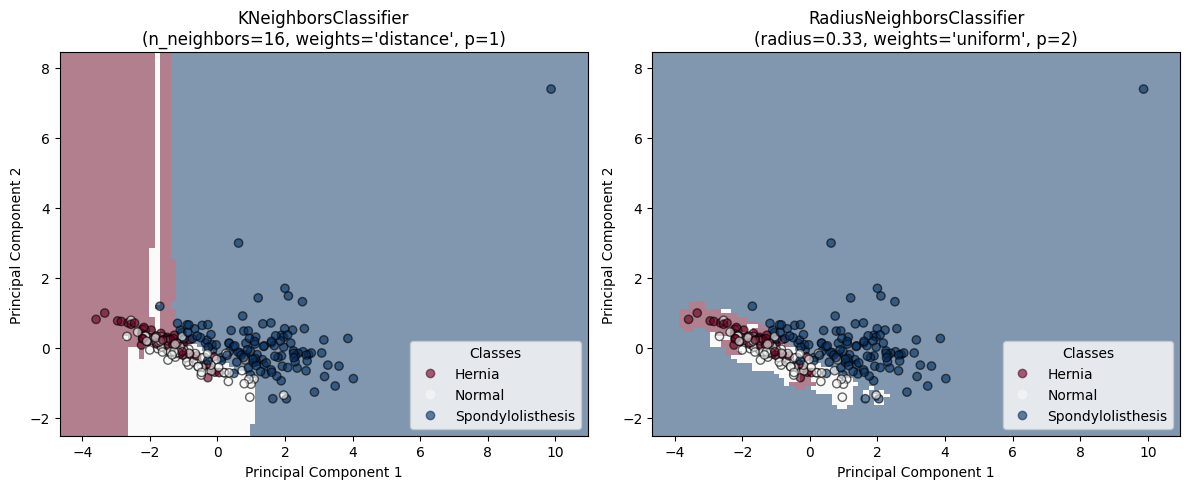

In [37]:
# Create a mesh grid for plotting the decision boundary
h = 0.02  # Step size in the mesh
# Use tighter ranges with 5% padding to avoid empty space
x_range = x_train_pca[:, 0].max() - x_train_pca[:, 0].min()
y_range = x_train_pca[:, 1].max() - x_train_pca[:, 1].min()
padding_x = 0.05 * x_range
padding_y = 0.05 * y_range
x_min, x_max = x_train_pca[:, 0].min() - padding_x, x_train_pca[:, 0].max() + padding_x
y_min, y_max = x_train_pca[:, 1].min() - padding_y, x_train_pca[:, 1].max() + padding_y
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Create subplots for the two models
fig, axs = plt.subplots(ncols=2, figsize=(12, 5))

# Class names for the binary classification problem
class_names = ["Hernia", "Normal", "Spondylolisthesis"]  # Assuming 0 = Normal, 1 = Abnormal

for (model_name, model), ax in zip(tuned_models, axs):
    # Fit the model on the PCA-transformed data
    model.fit(x_train_pca, y_train)

    # Plot the decision boundary using DecisionBoundaryDisplay
    disp = DecisionBoundaryDisplay.from_estimator(
        model,
        x_train_pca,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel="Principal Component 1",
        ylabel="Principal Component 2",
        shading="auto",
        alpha=0.5,
        ax=ax,
        cmap=plt.cm.RdBu  # Red-blue colormap for binary classification
    )

    # Scatter the training points
    scatter = ax.scatter(
        x_train_pca[:, 0],
        x_train_pca[:, 1],
        c=y_train,
        cmap=plt.cm.RdBu,
        edgecolors="k",
        alpha=0.6
    )

    # Add a legend
    ax.legend(
        scatter.legend_elements()[0],
        class_names,
        loc="lower right",
        title="Classes",
    )

    # Set the title with the best hyperparameters
    if model_name == "KNeighborsClassifier":
        params_str = f"n_neighbors={model.n_neighbors}, weights='{model.weights}', p={model.p}"
    else:  # RadiusNeighborsClassifier
        params_str = f"radius={model.radius:.2f}, weights='{model.weights}', p={model.p}"
    ax.set_title(f"{model_name}\n({params_str})")

plt.tight_layout()
plt.show()

## Effect of rescaling on a k-neighbors models

Shape of x_train_pca: (248, 2)
Shape of x_train_withoutpca: (248, 2)


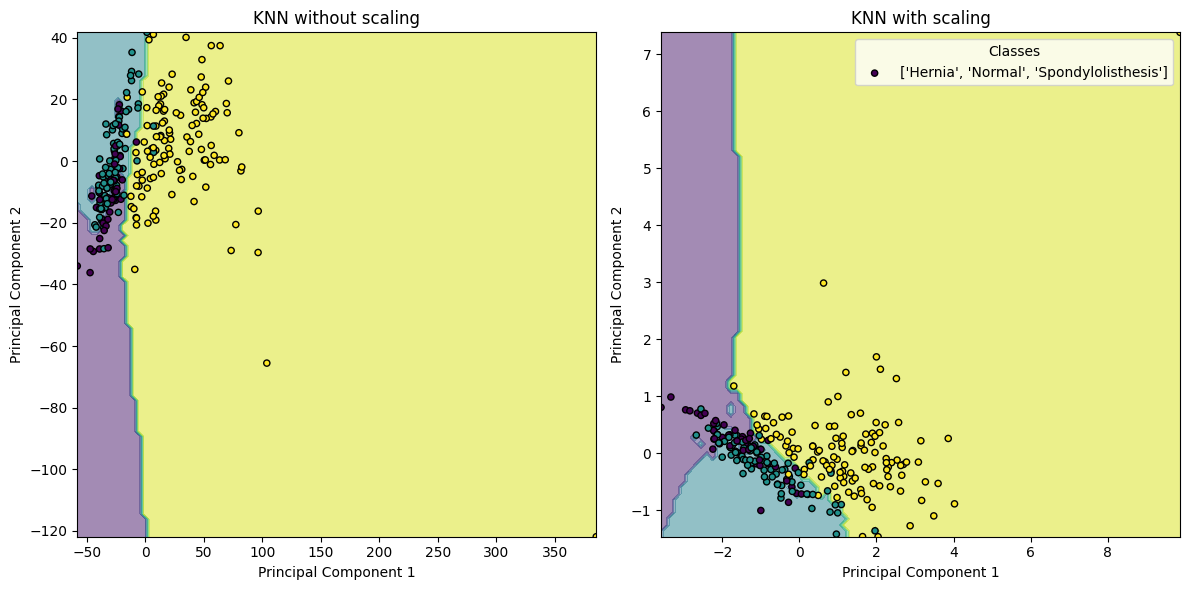

In [38]:
# Normalization to data
scaler = StandardScaler()
scaler.fit(x_train_withoutscale)
x_train_scaled = scaler.transform(x_train_withoutscale)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions
x_train_pca = pca.fit_transform(x_train_scaled)
x_train_withoutpca = pca.fit_transform(x_train_withoutscale)  # Recompute PCA for unscaled data

# Verify the shapes
print("Shape of x_train_pca:", x_train_pca.shape)  # Should be (248, 2)
print("Shape of x_train_withoutpca:", x_train_withoutpca.shape)  # Should be (248, 2)

# Define the classifier (using fixed hyperparameters for this example)
clf = KNeighborsClassifier(n_neighbors=16, weights='distance', p=2)

# Create a function to fit and plot the decision boundary
def fit_and_plot_model(X_plot, y, clf, ax, title, xlabel="Principal Component 1", ylabel="Principal Component 2"):
    clf.fit(X_plot, y)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_plot,
        response_method="predict",
        alpha=0.5,
        ax=ax,
    )
    disp.ax_.scatter(X_plot[:, 0], X_plot[:, 1], c=y, s=20, edgecolor="k")
    disp.ax_.set_xlim((X_plot[:, 0].min(), X_plot[:, 0].max()))
    disp.ax_.set_ylim((X_plot[:, 1].min(), X_plot[:, 1].max()))
    disp.ax_.set_xlabel(xlabel)
    disp.ax_.set_ylabel(ylabel)
    disp.ax_.set_title(title)
    return disp.ax_

# Create subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

# Plot without scaling
fit_and_plot_model(x_train_withoutpca, y_train_withoutscale, clf, ax1, "KNN without scaling")

# Plot with scaling
fit_and_plot_model(x_train_pca, y_train_withoutscale, clf, ax2, "KNN with scaling")

# Add legend with consistent array lengths
ax2.scatter([-1, 1], [-1, 1], c=[0, 1], label=["Hernia", "Normal", "Spondylolisthesis"], s=20, edgecolor="k")
ax2.legend(loc="upper right", title="Classes")

plt.tight_layout()
plt.show()

Shape of x_train_pca: (248, 2)
Shape of x_train_withoutpca: (248, 2)
PCA (scaled) data - Min distance: 0.0024461329626057496
PCA (scaled) data - Avg distance: 2.0955187515727776
PCA (unscaled) data - Min distance: 0.11288708527980727
PCA (unscaled) data - Avg distance: 47.763634910835535


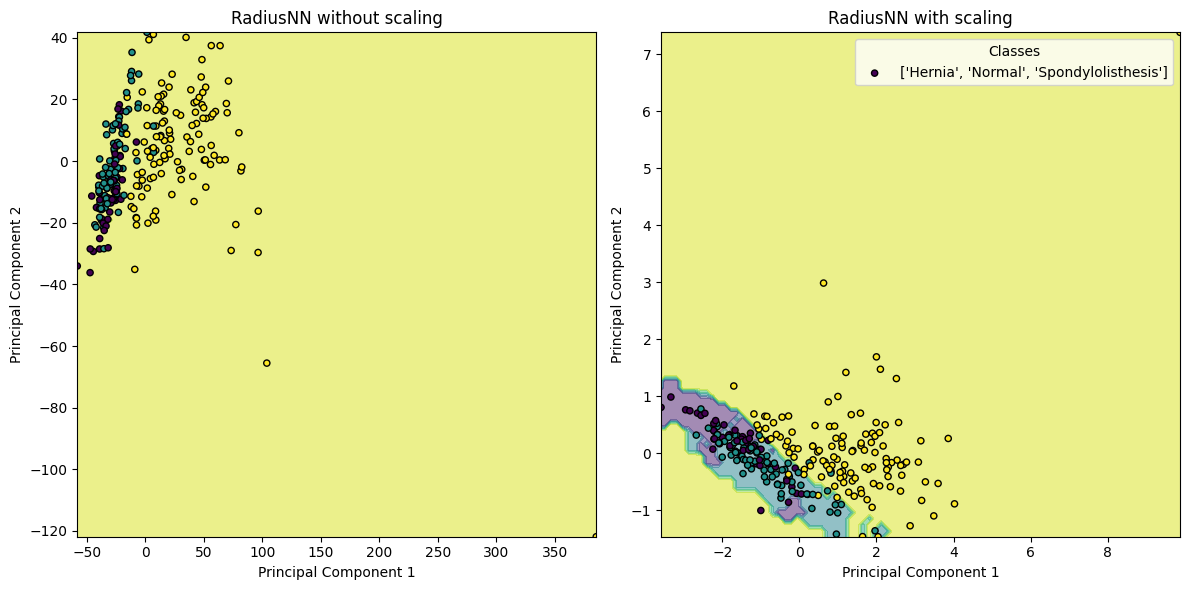

In [39]:
# Normalization to data
scaler = StandardScaler()
scaler.fit(x_train_withoutscale)
x_train_scaled = scaler.transform(x_train_withoutscale)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions
x_train_pca = pca.fit_transform(x_train_scaled)
x_train_withoutpca = pca.fit_transform(x_train_withoutscale)  # Recompute PCA for unscaled data

# Verify the shapes
print("Shape of x_train_pca:", x_train_pca.shape)  # Should be (248, 2)
print("Shape of x_train_withoutpca:", x_train_withoutpca.shape)  # Should be (248, 2)

# Compute distances to understand the scale of the PCA-transformed data
distances_pca = pairwise_distances(x_train_pca)
distances_withoutpca = pairwise_distances(x_train_withoutpca)
print("PCA (scaled) data - Min distance:", np.min(distances_pca[distances_pca > 0]))
print("PCA (scaled) data - Avg distance:", np.mean(distances_pca))
print("PCA (unscaled) data - Min distance:", np.min(distances_withoutpca[distances_withoutpca > 0]))
print("PCA (unscaled) data - Avg distance:", np.mean(distances_withoutpca))

# Define the classifier with an outlier label
clf = RadiusNeighborsClassifier(
    radius=0.33163804323272306, 
    weights='uniform', 
    p=2, 
    outlier_label='most_frequent'  # Add this to handle cases with no neighbors
)

# Create a function to fit and plot the decision boundary
def fit_and_plot_model(X_plot, y, clf, ax, title, xlabel="Principal Component 1", ylabel="Principal Component 2"):
    clf.fit(X_plot, y)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_plot,
        response_method="predict",
        alpha=0.5,
        ax=ax,
    )
    disp.ax_.scatter(X_plot[:, 0], X_plot[:, 1], c=y, s=20, edgecolor="k")
    disp.ax_.set_xlim((X_plot[:, 0].min(), X_plot[:, 0].max()))
    disp.ax_.set_ylim((X_plot[:, 1].min(), X_plot[:, 1].max()))
    disp.ax_.set_xlabel(xlabel)
    disp.ax_.set_ylabel(ylabel)
    disp.ax_.set_title(title)
    return disp.ax_

# Create subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

# Plot without scaling
fit_and_plot_model(x_train_withoutpca, y_train_withoutscale, clf, ax1, "RadiusNN without scaling")

# Plot with scaling
fit_and_plot_model(x_train_pca, y_train_withoutscale, clf, ax2, "RadiusNN with scaling")

# Add legend with consistent array lengths
ax2.scatter([-1, 1], [-1, 1], c=[0, 1], label=["Hernia", "Normal", "Spondylolisthesis"], s=20, edgecolor="k")
ax2.legend(loc="upper right", title="Classes")

plt.tight_layout()
plt.show()

# Model Evaluation

## Train the best model and Cross-validation

In [40]:
# Create the best model for KNeighborsClassifier
best_model = KNeighborsClassifier(
    n_neighbors=best_params["KNeighborsClassifier"]['n_neighbors'],
    weights=best_params["KNeighborsClassifier"]['weights'],
    p=best_params["KNeighborsClassifier"]['p']
)

# Fit the best model on the scaled training data
best_model.fit(x_train, y_train)

# Perform cross-validation with the best model
print("\nCross-Validation for Best KNeighborsClassifier Model on train dataset:")
print('-' * 100)
cv_scores = cross_val_score(best_model, x_train, y_train, cv=kf, scoring='accuracy')
print(f"\tK-Fold Cross-Validation: {cv_scores}")
print(f"\tAverage K-Fold Cross-Validation Accuracy: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")
print('-' * 100)

# Perform cross-validation with the best model
print("\nCross-Validation for Best KNeighborsClassifier Model on test dataset:")
print('-' * 100)
cv_scores = cross_val_score(best_model, x_test, y_test, cv=kf, scoring='accuracy')
print(f"\tK-Fold Cross-Validation: {cv_scores}")
print(f"\tAverage K-Fold Cross-Validation Accuracy: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")
print('-' * 100)


Cross-Validation for Best KNeighborsClassifier Model on train dataset:
----------------------------------------------------------------------------------------------------
	K-Fold Cross-Validation: [0.84       0.88       0.76       0.6        0.84       0.72
 0.88       0.72       0.79166667 0.875     ]
	Average K-Fold Cross-Validation Accuracy: 0.791 ± 0.087
----------------------------------------------------------------------------------------------------

Cross-Validation for Best KNeighborsClassifier Model on test dataset:
----------------------------------------------------------------------------------------------------
	K-Fold Cross-Validation: [0.57142857 0.57142857 1.         0.83333333 0.66666667 1.
 0.83333333 0.83333333 0.83333333 1.        ]
	Average K-Fold Cross-Validation Accuracy: 0.814 ± 0.156
----------------------------------------------------------------------------------------------------


## Classification metrics and classification reports evaluation

In [41]:
# Make predictions on the test data
y_pred = best_model.predict(x_test)

# Calculate metrics
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=1)  # Set zero_division=1
recall = recall_score(y_test, y_pred, average='macro', zero_division=1)  # Set zero_division=1
f1 = f1_score(y_test, y_pred, average='macro', zero_division=1)  # Set zero_division=1

# Calculate predicted probabilities (assuming you have a multiclass model)
y_pred_proba = best_model.predict_proba(x_test)
# Choose between OVO or OVR (based on your preference)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovo')  # Or 'ovr'

# Print the results
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")
print(f"AUC-ROC: {roc_auc:.3f}")

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

Accuracy: 0.516
Precision: 0.839
Recall: 0.333
F1-score: 0.227
AUC-ROC: 0.556

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        12
           1       1.00      0.00      0.00        18
           2       0.52      1.00      0.68        32

    accuracy                           0.52        62
   macro avg       0.84      0.33      0.23        62
weighted avg       0.75      0.52      0.35        62



## Confusion matrix


Class distribution in y_test: [12 18 32]
Class distribution in y_pred: [ 0  0 62]


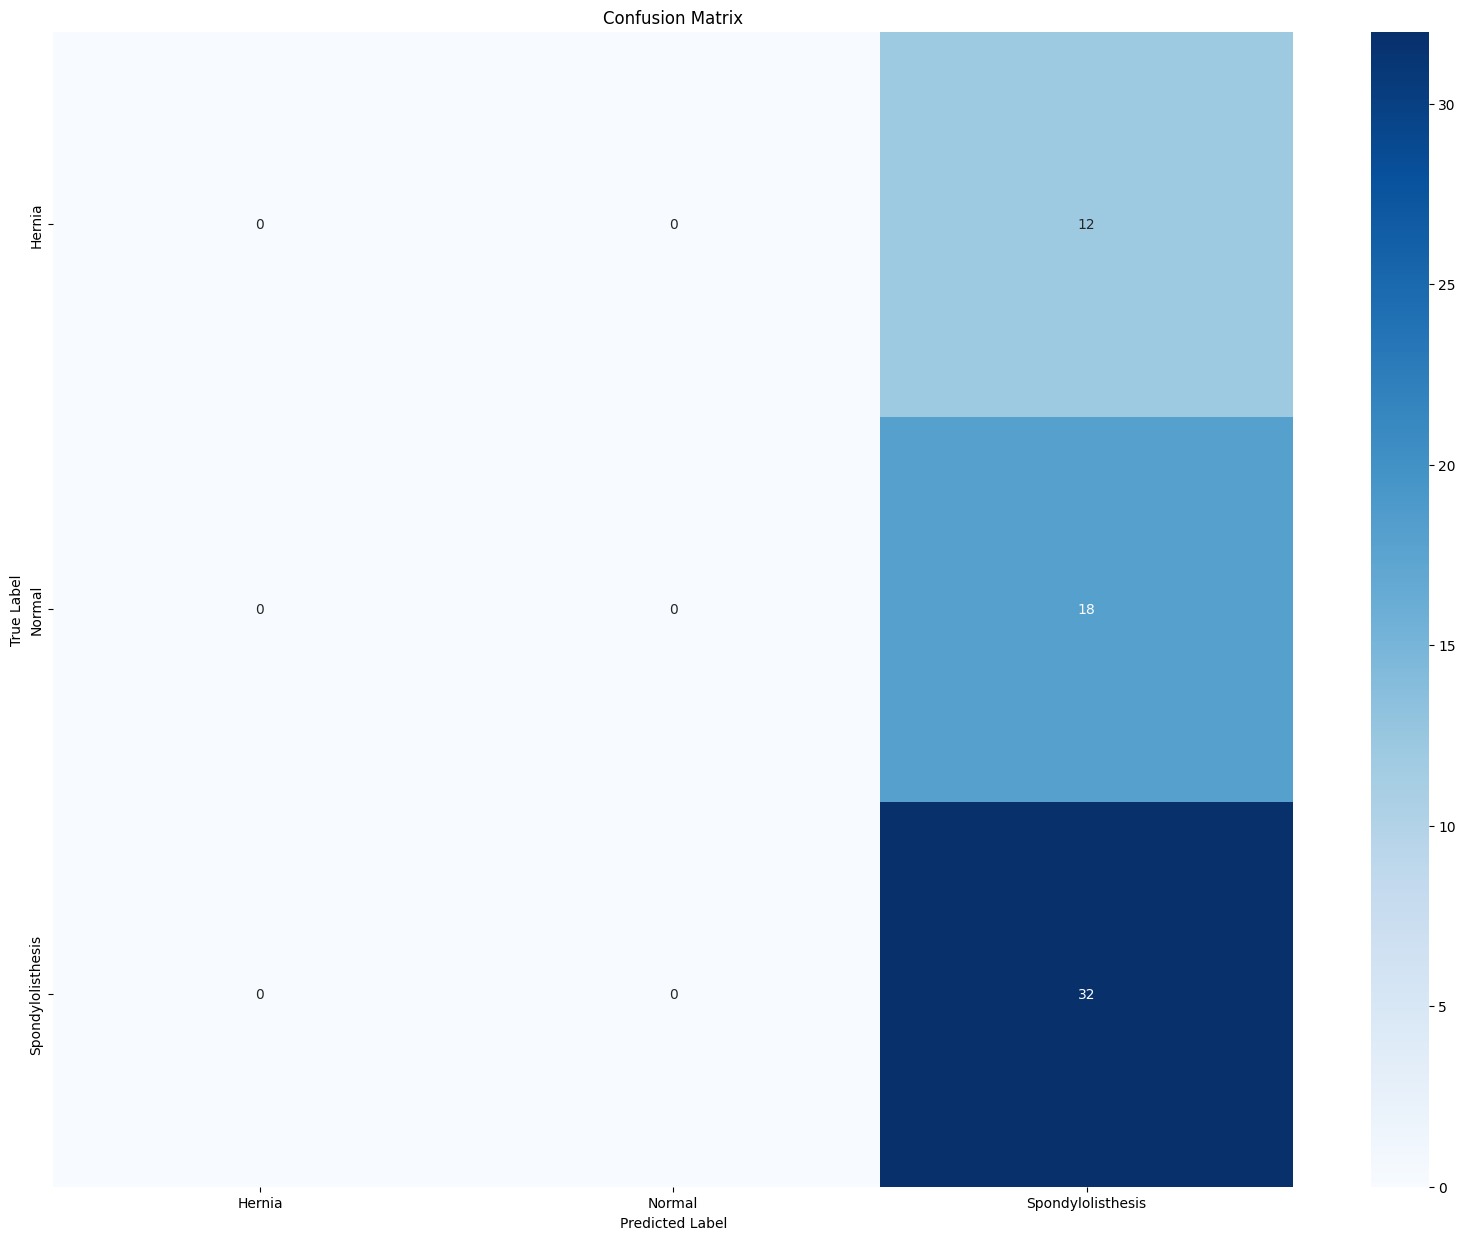

In [42]:
# Check class distribution in y_test and y_pred
print("\nClass distribution in y_test:", np.bincount(y_test))
print("Class distribution in y_pred:", np.bincount(y_pred))

# Define the original class names (before encoding) based on the label mapping
class_names = ["Hernia", "Normal", "Spondylolisthesis"]  # Mapping: 0=Hernia, 1=Normal, 2=Spondylolisthesis

# Optional: Visualize the confusion matrix
plt.figure(figsize=(20, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## Precision Recall Curve

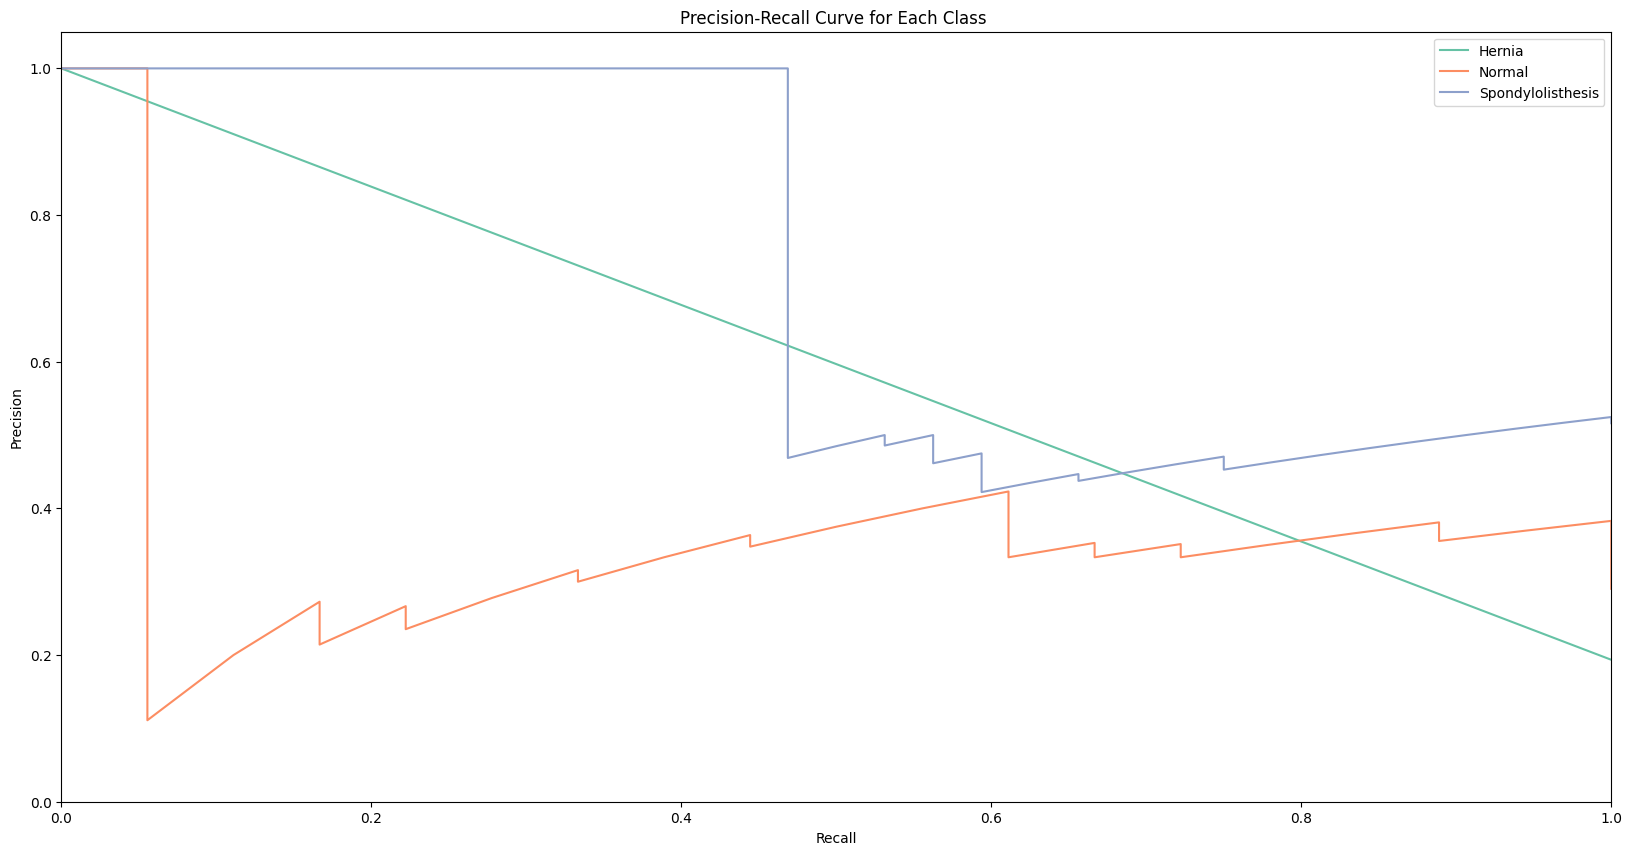

In [43]:
# Define class labels
class_labels = ["Hernia", "Normal", "Spondylolisthesis"]

# Convert true labels to 1D 
y_test_labels = y_test.flatten()

# Initialize a plot
plt.figure(figsize=(20, 10))

# Set Seaborn color palette
sns.set_palette("Set2")

# Generate Precision-Recall curve for each class (OvR)
for i, label in enumerate(class_labels):
  # Get the true binary labels for the current class (OvR)
  y_test_bin = np.where(y_test_labels == i, 1, 0)

  # Get the predicted probabilities for the current class
  y_pred_prob = best_model.predict_proba(x_test)[:, i] 

  # Compute Precision-Recall values (OvR)
  precision, recall, _ = precision_recall_curve(y_test_bin, y_pred_prob)

  # Plot the curve
  plt.plot(recall, precision, label=label)

# Add plot details
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Each Class ")
plt.legend(loc="upper right")
plt.ylim([0, 1.05])
plt.xlim([0, 1])

# Show the plot
plt.show()

## ROC AUC Curve


------------------------------------------------------------------------------------------------------------------------------------------------------
Hernia AUC: 0.5000

------------------------------------------------------------------------------------------------------------------------------------------------------
Normal AUC: 0.6111

------------------------------------------------------------------------------------------------------------------------------------------------------
Spondylolisthesis AUC: 0.5438

------------------------------------------------------------------------------------------------------------------------------------------------------


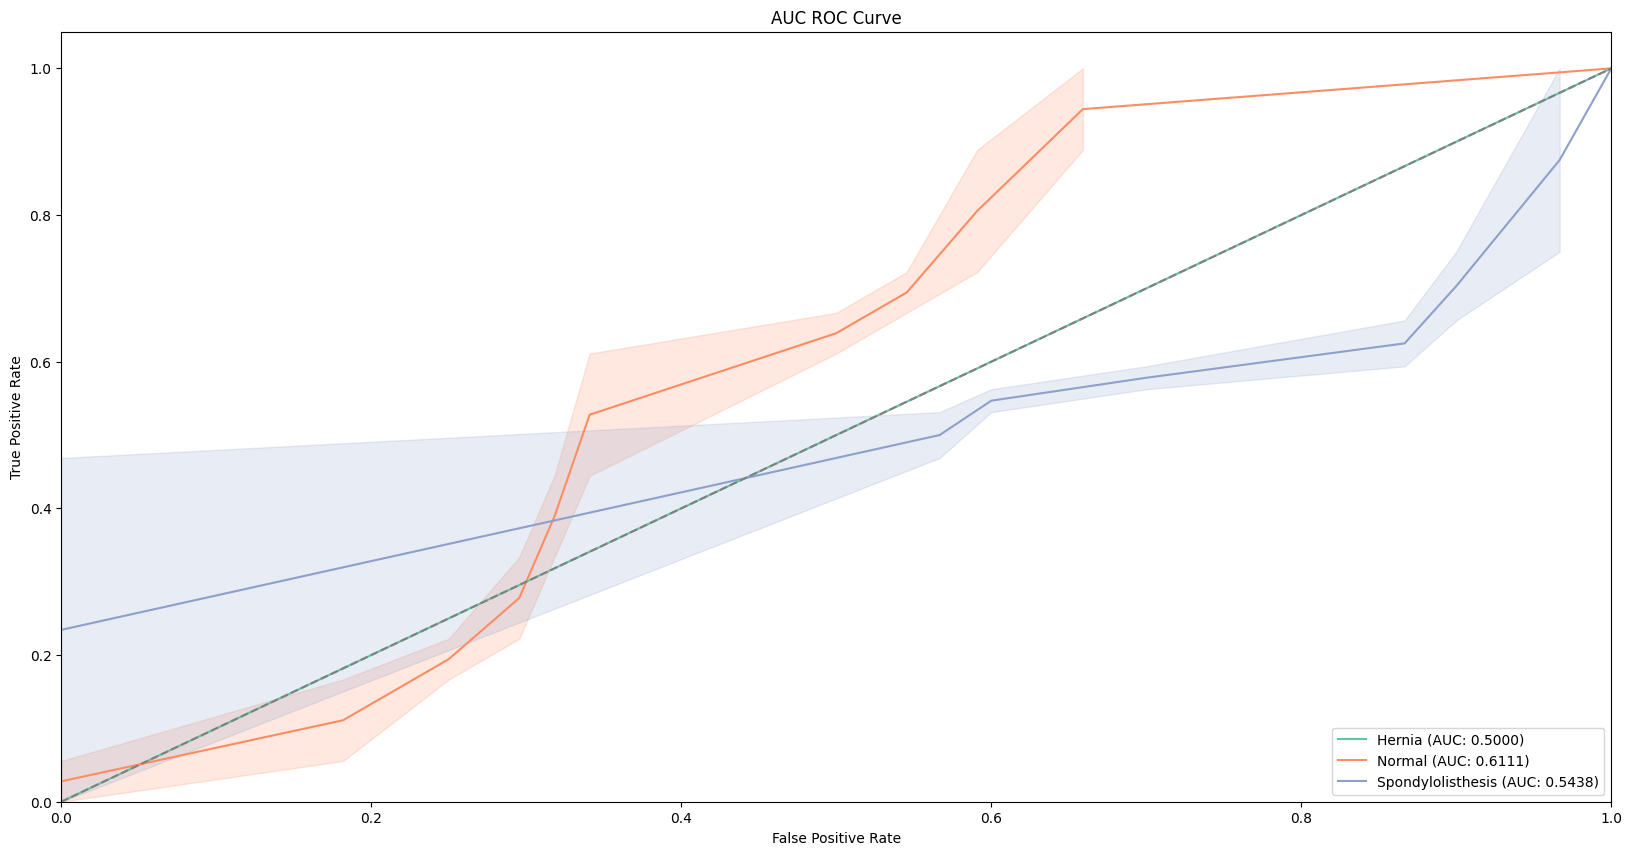

In [44]:
# Make predictions on the test data
y_pred = best_model.predict_proba(x_test)

# Define class labels
class_labels = ["Hernia", "Normal", "Spondylolisthesis"]
# Binarize the true labels for multi-class (one-vs-rest)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Adjusted to match the 3 classes

# Initialize ROC curve and AUC dictionaries
fpr = dict()
tpr = dict()
roc_auc = dict()

# Loop over each class and calculate the ROC curve and AUC score
for i, class_label in enumerate(class_labels):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred[:, i])
    # Check and replace inf values with NaN
    fpr[i] = np.where(np.isinf(fpr[i]), np.nan, fpr[i])
    tpr[i] = np.where(np.isinf(tpr[i]), np.nan, tpr[i])
    # Remove NaN values (though unlikely with roc_curve)
    mask = ~np.isnan(fpr[i]) & ~np.isnan(tpr[i])
    fpr[i] = fpr[i][mask]
    tpr[i] = tpr[i][mask]
    roc_auc[i] = auc(fpr[i], tpr[i])

# Create a new figure using Seaborn
plt.figure(figsize=(20, 10))

# Set Seaborn color palette
sns.set_palette("Set2")

# Plot ROC curve for each class
for i, class_label in enumerate(class_labels):
    sns.lineplot(x=fpr[i], y=tpr[i], label=f'{class_label} (AUC: {roc_auc[i]:.4f})')

# Plot the random guessing line (optional)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC ROC Curve')
plt.legend(loc="lower right")

# Show AUC values for each class
for i, class_label in enumerate(class_labels):
    print()
    print('-' * 150)
    print(f"{class_label} AUC: {roc_auc[i]:.4f}")
print()
print('-' * 150)
plt.show()